# Aprendizaje supervisado - Fundamentos del proyecto: ReCell 

## Descripción del problema

### Contexto empresarial
La compra y venta de teléfonos y tabletas usados ​​solía ser algo que sucedía en un puñado de sitios de mercado en línea. Pero el mercado de dispositivos usados ​​y reacondicionados ha crecido considerablemente durante la última década, y un nuevo pronóstico de IDC (International Data Corporation) predice que el mercado de teléfonos usados ​​tendrá un valor de \$52.700 millones para 2023 con una tasa de crecimiento anual compuesto (CAGR) de 13,6 % de 2018 a 2023. Este crecimiento se puede atribuir a un aumento en la demanda de teléfonos y tabletas usados ​​que ofrecen ahorros considerables en comparación con los nuevos modelos.

Los dispositivos reacondicionados y usados ​​continúan brindando alternativas rentables tanto para los consumidores como para las empresas que buscan ahorrar dinero al comprar uno. Hay muchos otros beneficios asociados con el mercado de dispositivos usados. Los dispositivos usados ​​y reacondicionados se pueden vender con garantía y también se pueden asegurar con el comprobante de compra. Proveedores/plataformas de terceros, como Verizon, Amazon, etc., ofrecen ofertas atractivas a los clientes para dispositivos reacondicionados. Maximizar la longevidad de los dispositivos a través del comercio de segunda mano también reduce su impacto ambiental y ayuda a reciclar y reducir los desechos. El impacto del brote de COVID-19 puede impulsar aún más este segmento, ya que los consumidores reducen los gastos discrecionales y compran teléfonos y tabletas solo para necesidades inmediatas.

### Objetivo
El creciente potencial de este mercado comparativamente bajo el radar alimenta la necesidad de una solución basada en ML para desarrollar una estrategia de precios dinámica para dispositivos usados ​​y reacondicionados. ReCell, una startup que busca aprovechar el potencial de este mercado, lo ha contratado como científico de datos. Quieren que analice los datos proporcionados y construya un modelo de regresión lineal para predecir el precio de un teléfono/tableta usado e identificar los factores que lo influyen significativamente.

### Descripción de datos
Los datos contienen los diferentes atributos de teléfonos y tabletas usados/reacondicionados. Los datos se recopilaron en el año 2021. El diccionario de datos detallado se proporciona a continuación.

--brand_name: Nombre de la marca de fabricación

-os: sistema operativo en el que se ejecuta el dispositivo

-screen_size: Tamaño de la pantalla en cm

-4g: si 4G está disponible o no

-5g: si 5G está disponible o no

-main_camera_mp: Resolución de la cámara trasera en megapíxeles

-selfie_camera_mp: Resolución de la cámara frontal en megapíxeles

-int_memory: Cantidad de memoria interna (ROM) en GB

-ram: cantidad de RAM en GB

-battery: capacidad energética de la batería del dispositivo en mAh

-weight: Peso del dispositivo en gramos

-release_year: año en que se lanzó el modelo del dispositivo

-days_used: número de días que se ha utilizado el dispositivo usado/reconstruido

-normalized_new_price: Precio normalizado de un dispositivo nuevo del mismo modelo en euros

-normalized_used_price: Precio normalizado del dispositivo usado/reacondicionado en euros


## 1. Importar librerias necesarias

In [1235]:
# Librerías para la manipulación de datos
import numpy as np
import pandas as pd

# Librerías para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Libreria para dividir el conjunto de datos en datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

# Librería para la consutrucción del modelo de regresión lineal con sklearn
from sklearn.linear_model import LinearRegression

# Librerías para revisar el performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Librería para la consutrucción del modelo de regresión lineal con statsmodel
import statsmodels.api as sm

# Librería para el análisis de multicolinealidad de variables en un modelo de regresión lineal múltiple (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libreria para series temporales
import datetime

## 2. Cargando el conjunto de datos

In [1236]:
df = pd.read_csv('./used_device_data.csv')
target = 'normalized_used_price'
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Resumen de datos

In [1237]:
# Visualización de columnas 
df.columns.values

array(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'], dtype=object)

* Columnas perfectamente escritas sin nungun espacio en blanco que me generen problemas a largo plazo

In [1238]:
# revisamos la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* A simple vista podemos detectar valores faltantes en algunas variables que no completan el total que es 3454

In [1239]:
# Resumen estadistico 

univariate = df.describe().transpose()
univariate.reset_index(inplace = True)        # quito los indices
univariate.rename(columns = {'index':'feature',   # cambio los nombres
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)
univariate

,feature,count,mean,std,min,Q1,median,Q3,max
0,screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
1,main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
2,selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
3,int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
4,ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
5,battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
6,weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
7,release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
8,days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
9,normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


* No hay mucha variación entre la mediana y la moda, excepto la variable (int_memory), lo cual puede ser indicio de outliers
* Valores minimos extraños sobre las variables (main_camera_mp, selfie_camera_mp, int_memory,ram), indicio de mala escritura o outliers
* No es muy común usar año para explicar un modelo, quiza sea una mejor opción usar cantidad en años desde el lanzamiento hasta el año actual

In [1240]:
# Creando métricas de las variables
univariate[['missing_rate']] = 1 - univariate[['count']]/df.shape[0]   # evaluo el porcentaje de valores nulos
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)  # ordeno del mayor a menor
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
1,main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000,0.051824
6,weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000,0.002027
5,battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000,0.001737
3,int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000,0.001158
4,ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000,0.001158
2,selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000,0.000579
0,screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000,0.000000
7,release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000,0.000000
8,days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000,0.000000
9,normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433,0.000000


* Podemos obervar en la columna "missing_rate" el porcentaje de valores nulos con respecto a cada variable
* Existe presencia de valores nulos, pero no hay un gran porcentaje como para quitar la variable

In [1241]:
# Analisis de duplicados
duplicados = df.duplicated().sum()
duplicados

0

* No hay valores duplicados

In [1242]:
# ANALISIS DEL TARGET
df[['normalized_used_price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.7557,6.619433


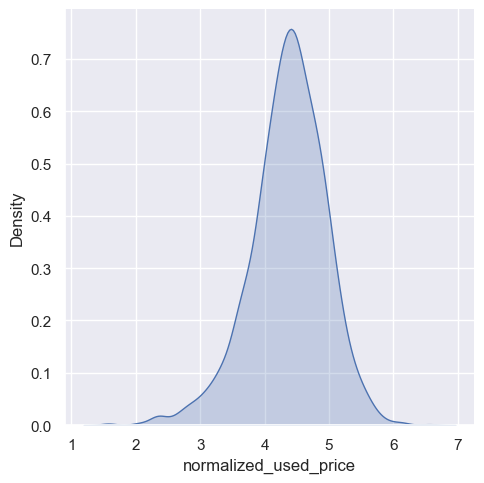

In [1243]:
# Gráfico de distribución 
sns.displot(df.normalized_used_price, kind="kde", fill=True)

* Mi variable objetivo sigue una distribución normal con sus datos actuales

In [1244]:
df.normalized_used_price.isnull().sum()

0

* No tiene valores nulos

## 3. Análisis exploratorio de datos (EDA)

- EDA es una parte importante de cualquier proyecto que involucre datos.
- Es importante investigar y comprender mejor los datos antes de construir un modelo con ellos.
- A continuación se mencionan algunas preguntas que lo ayudarán a abordar el análisis de la manera correcta y generar conocimientos a partir de los datos.
- Se debe realizar un análisis exhaustivo de los datos, además de las preguntas que se mencionan a continuación.

**Preguntas**:

1. ¿Cómo es la distribución de precios normalizados de dispositivos usados?
2. ¿Qué porcentaje del mercado de dispositivos usados está dominado por dispositivos Android?
3. La cantidad de RAM es importante para el buen funcionamiento de un dispositivo. ¿Cómo varía la cantidad de RAM según la marca?
4. Una batería grande a menudo aumenta el peso del dispositivo, lo que hace que se sienta incómodo en las manos. ¿Cómo varía el peso de los teléfonos y tabletas que ofrecen baterías grandes (más de 4500 mAh)?
5. Las pantallas más grandes son deseables para fines de entretenimiento, ya que ofrecen una mejor experiencia de visualización. ¿Cuántos teléfonos y tabletas están disponibles en diferentes marcas con un tamaño de pantalla de más de 6 pulgadas?
6. Hoy en día, muchos dispositivos ofrecen excelentes cámaras para selfies, lo que nos permite capturar nuestros momentos favoritos con nuestros seres queridos. ¿Cuál es la distribución de dispositivos que ofrecen cámaras para selfies de más de 8 MP entre marcas?
7. ¿Qué atributos están altamente correlacionados con el precio normalizado de un dispositivo usado?

### Análisis univariado

técnica de análisis de datos que se enfoca en el estudio de una sola variable a la vez.

In [1245]:
def plot_boxplot_histogram(data, feature, figsize=(10, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(   # Se crean dos subplots, uno para boxplot y otro para el histograma
        nrows=2,
        sharex=True,  # comparten el eje x
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # tamaño de los gráficos
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"  #showmeans indica que se mostrará la media
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins   #kde indica la linea de densidad
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Agrega ka nedia de la variable feature
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Agrega la mediana de la variable feature
    ax_box2.set_title(f"Boxplot e Histograma de {feature}", 
                      fontdict = {'fontsize': 15})
    plt.show()

In [1246]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Longitud de la columna feature
    count = data[feature].nunique() # Número de valores únicos de en la columna
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Porcentaje de cada clase categorica
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Agregar etiqueta de la variable label

    plt.show()  

In [1247]:
# Definiendo nuestras variables categóricas y numericas
df_categoricas = df.select_dtypes(include=['object']).columns.to_list()
df_numericas = df.select_dtypes(exclude=['object']).columns.to_list()
print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df_numericas)

Variables categoricas
 ['brand_name', 'os', '4g', '5g']
Variables numericas
 ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


#### Mostrando las variables numéricas

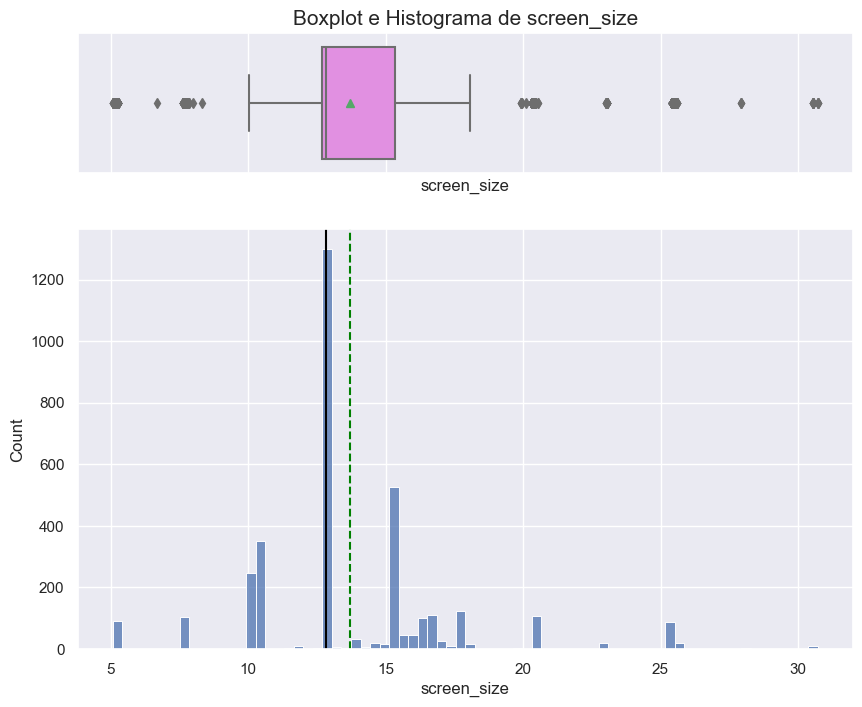

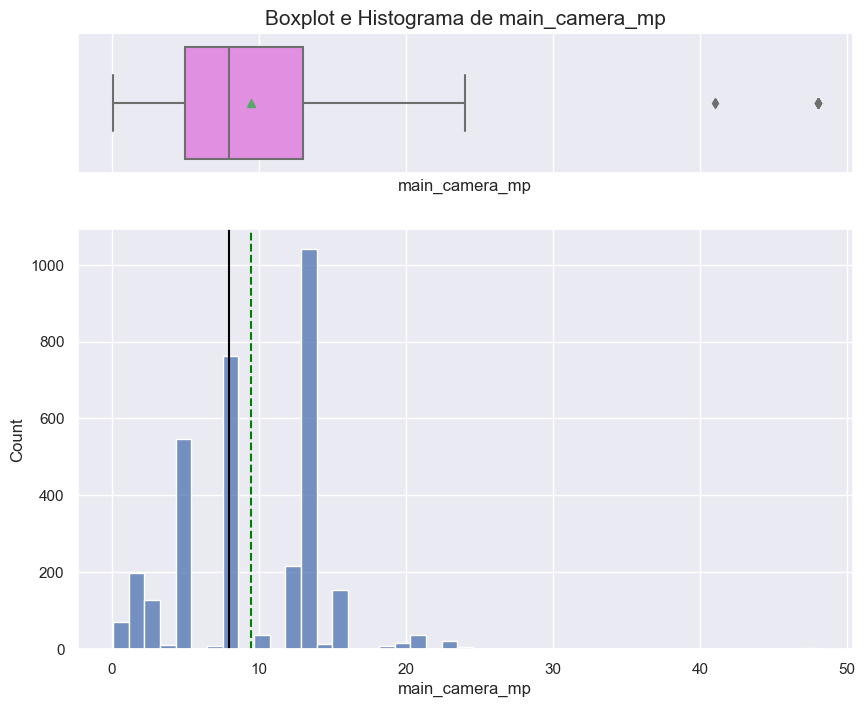

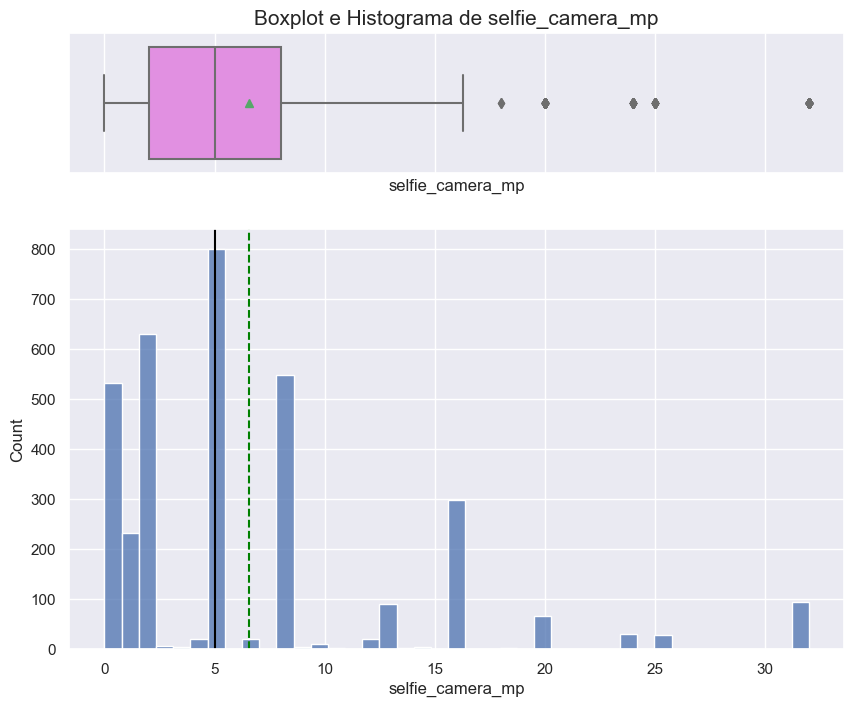

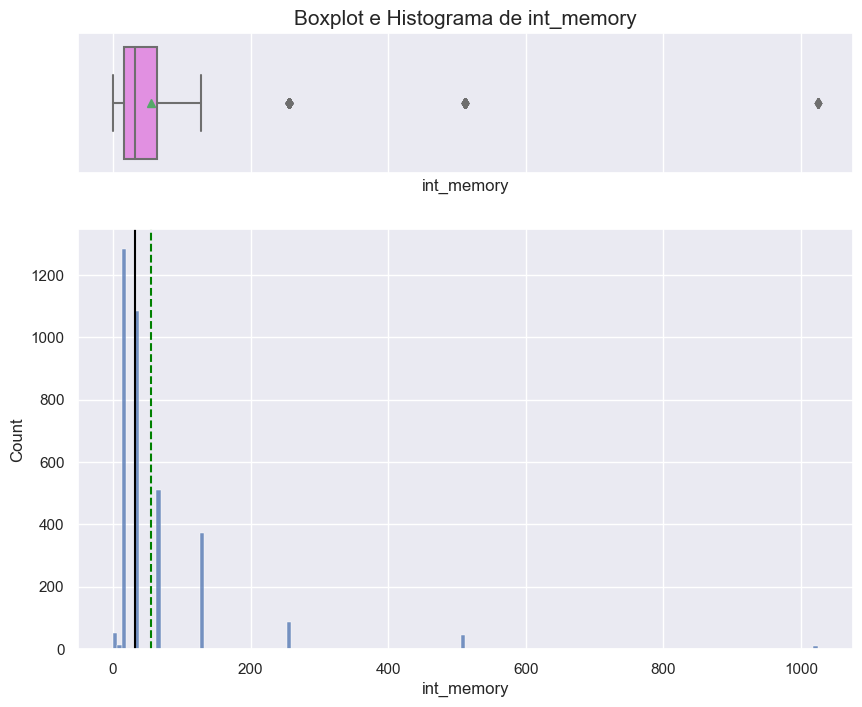

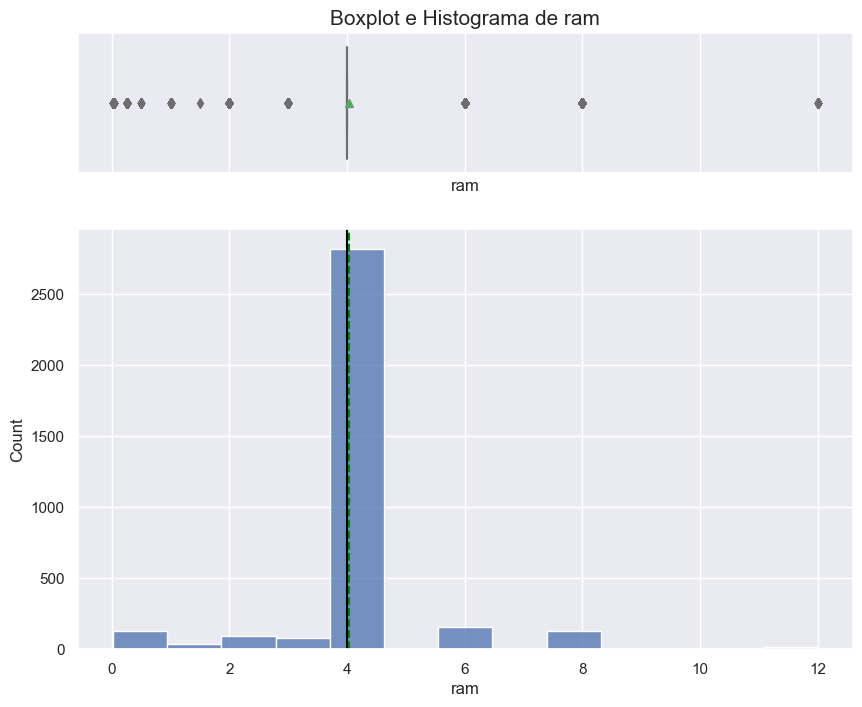

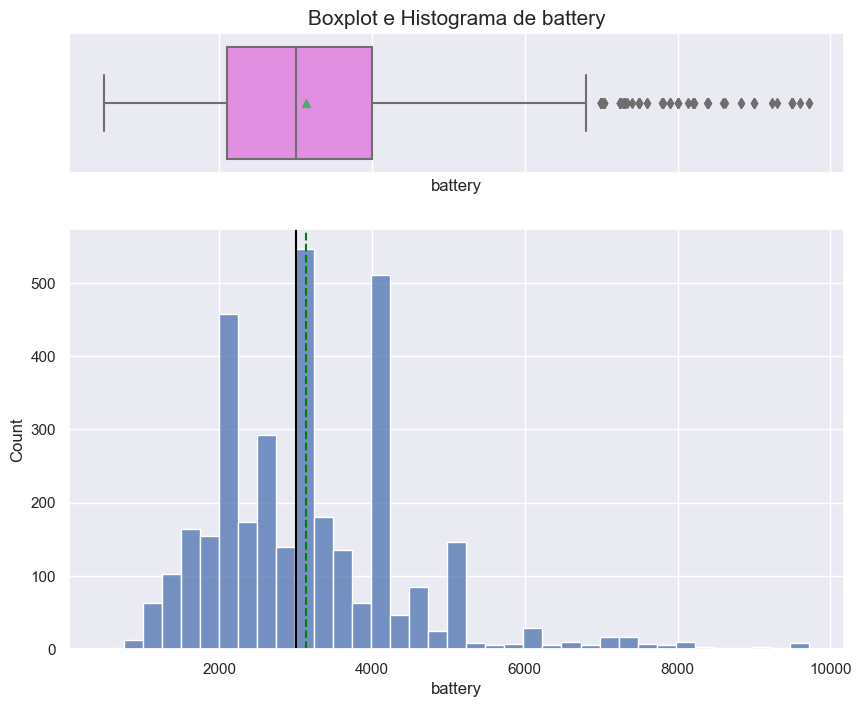

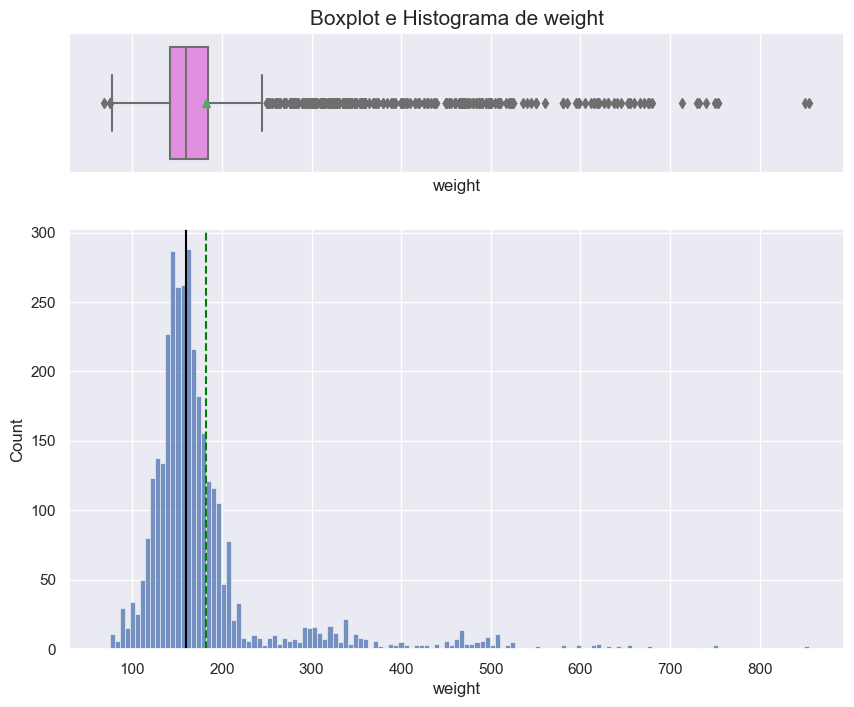

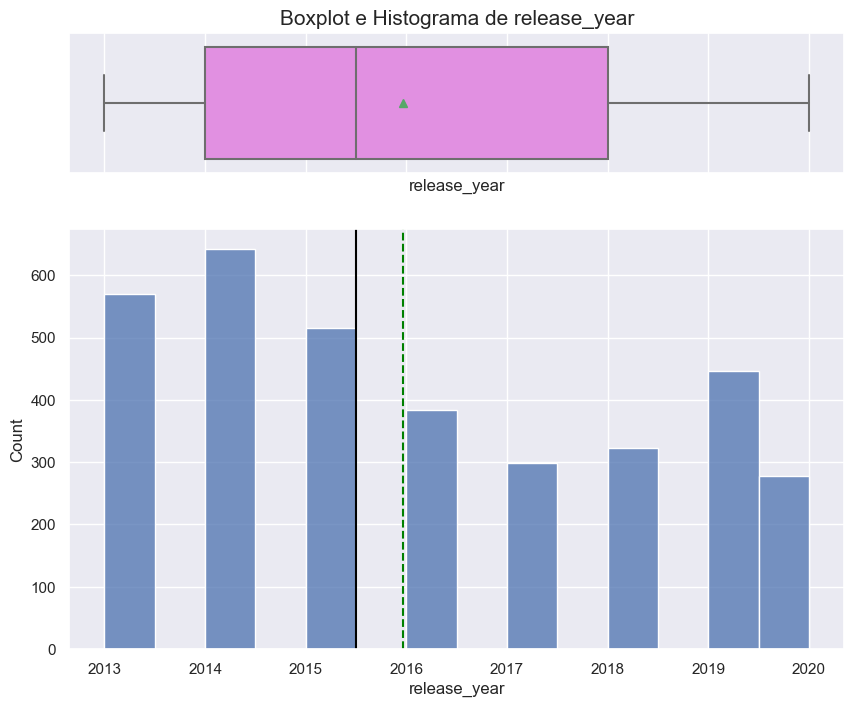

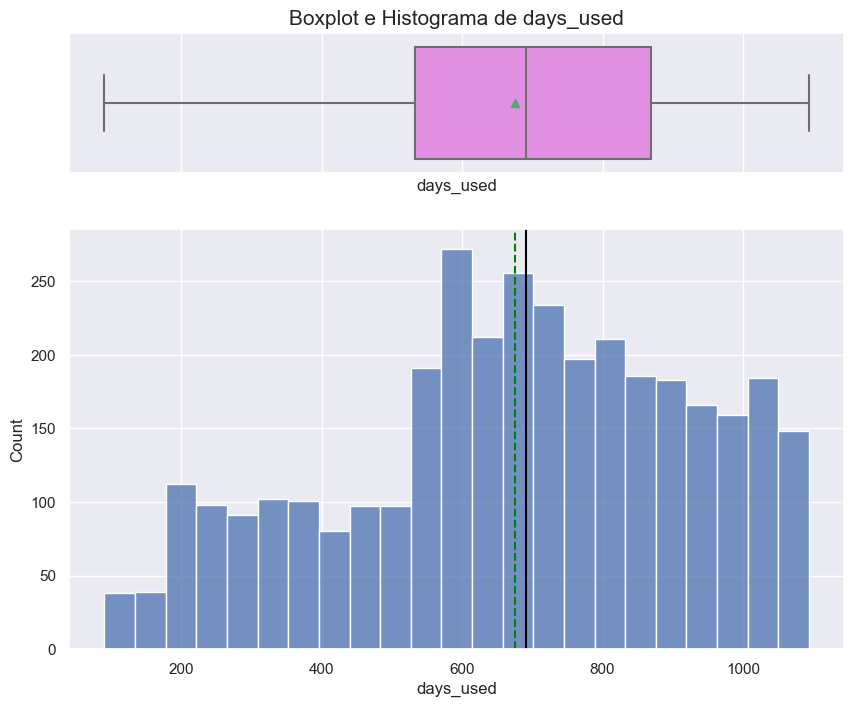

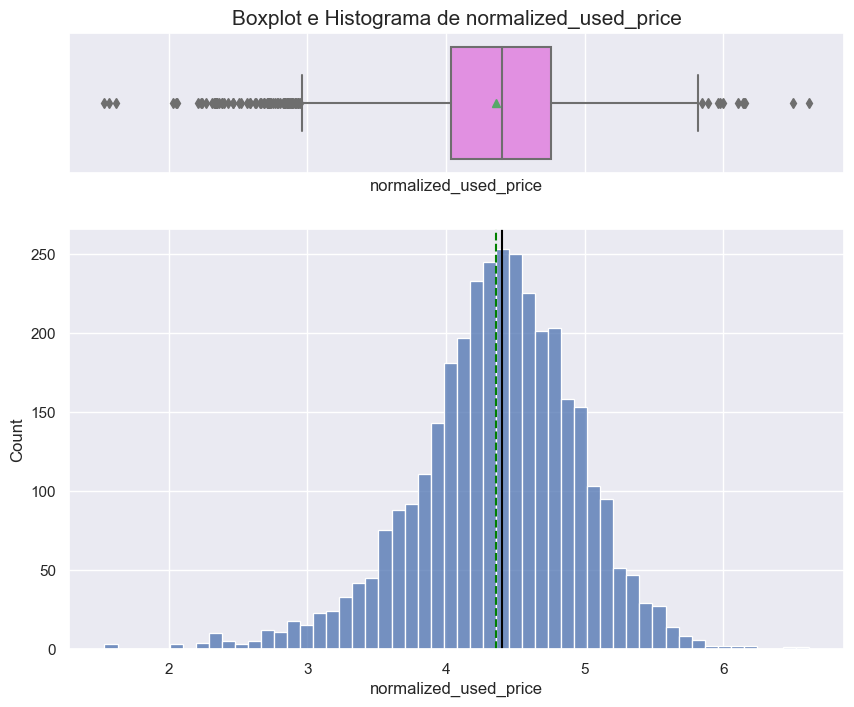

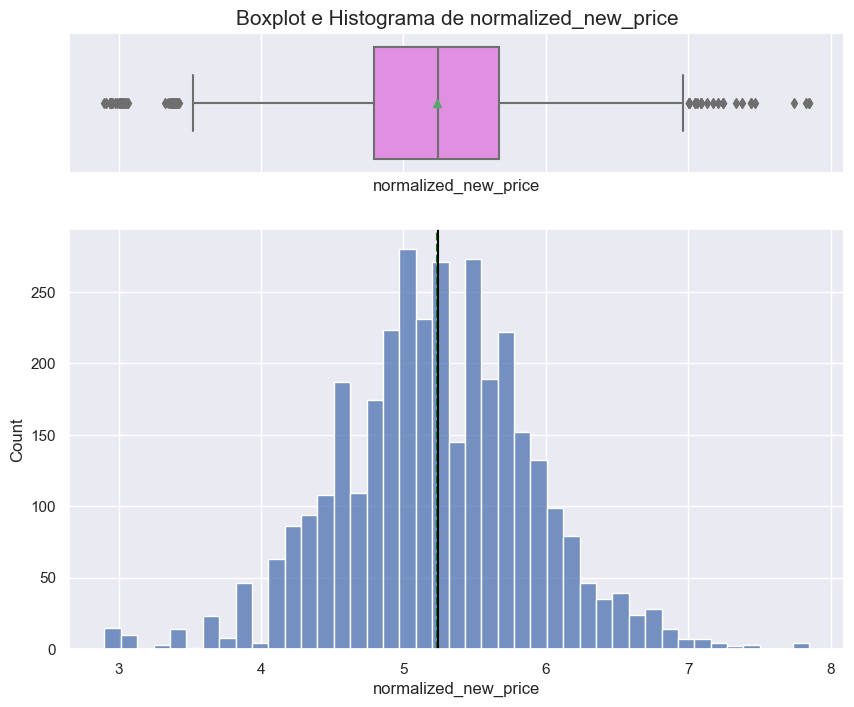

In [1248]:
for i in df_numericas:
    plot_boxplot_histogram(df, i)

**Observaciones**

* Notamos que la mayoria de variables siguen una distribución con cola a la derecha y otros tiene la presencia de outliers

#### Mostrando las variables categóricas

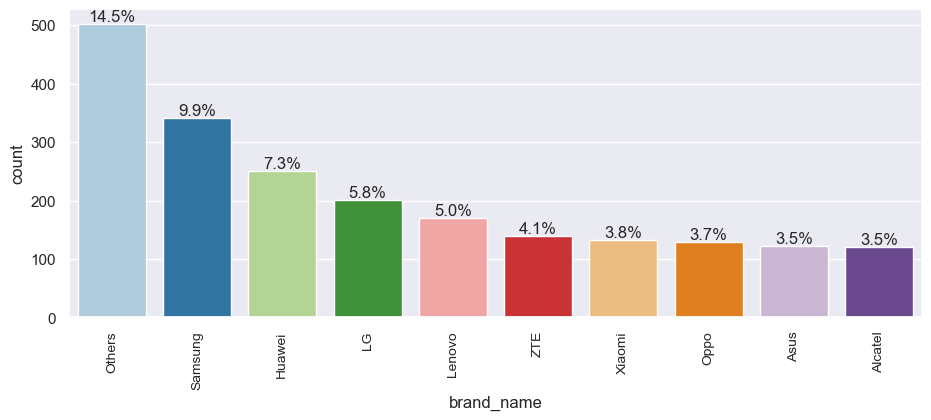

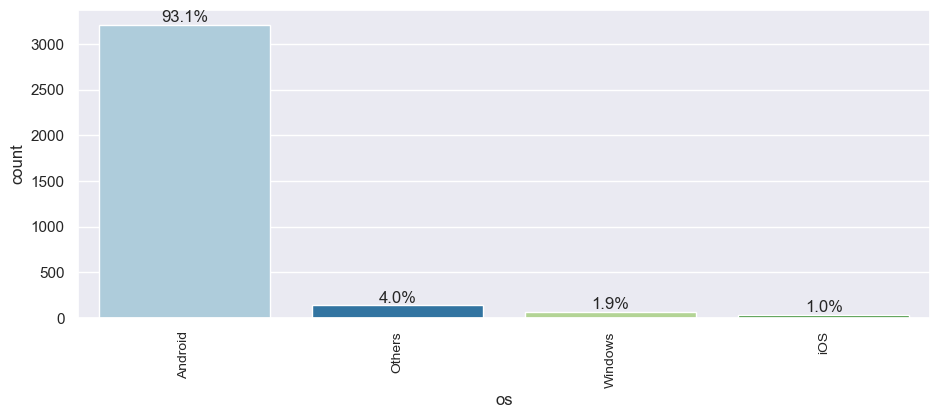

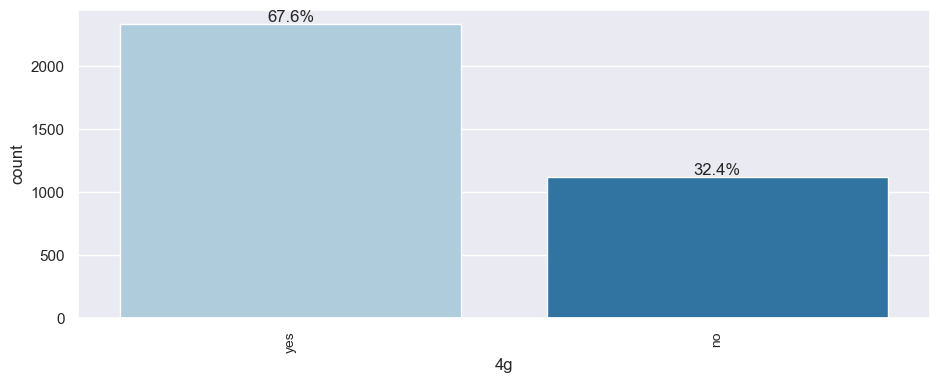

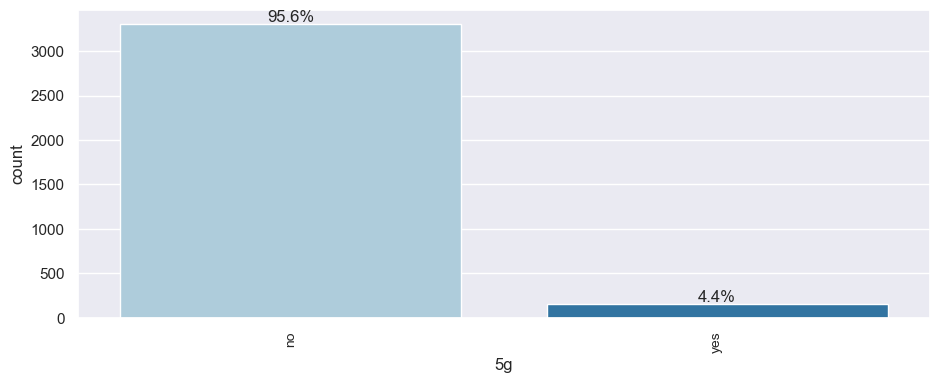

In [1249]:
for i in df_categoricas:
    labeled_barplot(df, i, perc=True,n=10)

### Análisis bivariado

**Revisamos la correlación**

In [1250]:
# Manera 1
# matriz de correlaciones
df_numericas.remove("release_year")  # Lo quitamos por ser un variable temporal
corr_matrix = df[df_numericas].corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', 'normalized_used_price': 'correl'}, inplace = True)
corr_matrix

,feature,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,correl,normalized_new_price
0,screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,-0.291723,0.614785,0.460889
1,main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,-0.144672,0.587302,0.541655
2,selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,-0.552636,0.608074,0.475479
3,int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,-0.242712,0.190993,0.195992
4,ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,-0.280066,0.520289,0.532056
5,battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,-0.370895,0.613619,0.470754
6,weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,-0.067470,0.382354,0.269540
7,days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,1.000000,-0.358264,-0.216625
8,normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,-0.358264,1.000000,0.834496
9,normalized_new_price,0.460889,0.541655,0.475479,0.195992,0.532056,0.470754,0.269540,-0.216625,0.834496,1.000000


<AxesSubplot:>

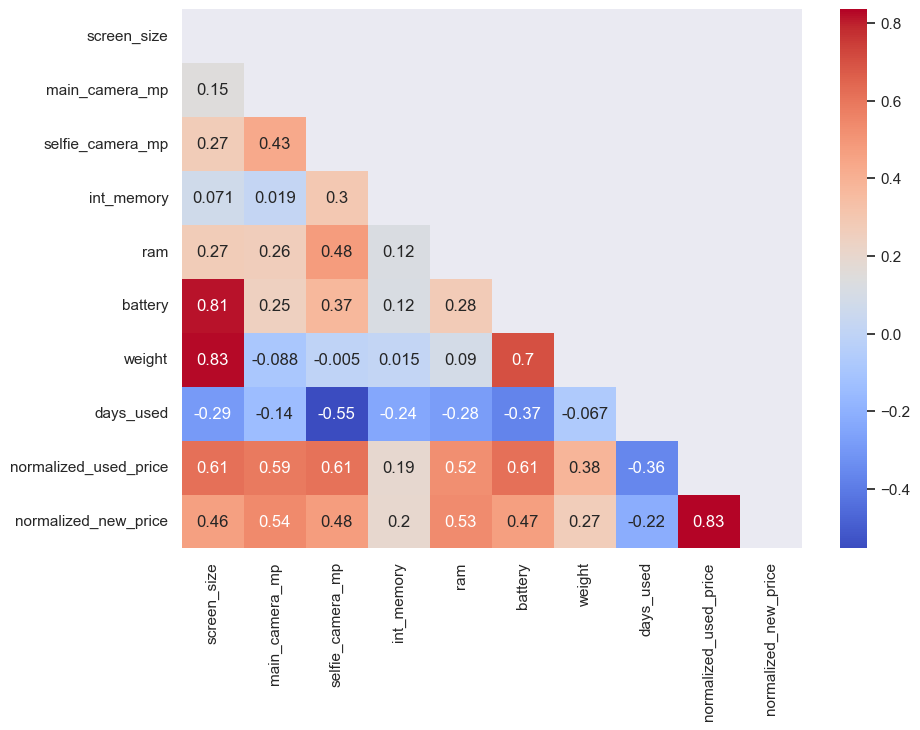

In [1251]:
# Manera 2
# Visualización de un headmap
plt.figure(figsize= (10,7))
correlaciones = df[df_numericas].corr()
upp_mat = np.triu(correlaciones)        #upp_mat, crea una matriz triangular superior a la matriz dada
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat) 

**Observaciones**

- El precio normalizado de los dispositivos usados está muy correlacionado con el precio normalizado de un modelo de dispositivo nuevo.
    - Esto tiene sentido, ya que el precio de un modelo nuevo puede afectar al precio del dispositivo usado.
- El precio normalizado del dispositivo usado también está moderadamente correlacionado con la resolución de las cámaras proporcionadas, el tamaño de la pantalla y la capacidad de la batería.
- El peso, el tamaño de la pantalla y la capacidad de la batería de un dispositivo muestran una buena correlación.
    - Esto tiene sentido, ya que una mayor capacidad de la batería requiere un mayor espacio, lo que aumenta el tamaño de la pantalla y el peso.
- El número de días de uso de un dispositivo está correlacionado negativamente con la resolución de su cámara frontal.
    - Esto tiene sentido, ya que los dispositivos más antiguos no ofrecían cámaras frontales tan potentes como los recientes.

#### 1. ¿Cómo es la distribución de precios normalizados de dispositivos usados?

Para resolver esta pregunta vamos a recurrir a un histograma, con una linea de densidad para ver la distribución

Text(8.194444444444445, 0.5, 'Frecuencia')

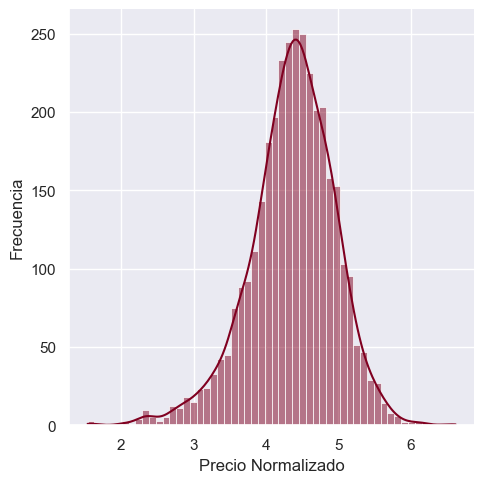

In [1252]:
sns.displot(df, x="normalized_used_price", kde=True, color='#800020')
plt.xlabel("Precio Normalizado", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

**Observaciones**

* A simple vista se ve que los datos de precios normalizados siguen una distribución normal

#### 2. ¿Qué porcentaje del mercado de dispositivos usados está dominado por dispositivos Android?

In [1253]:
# Para calcular la proporción de android con respecto al total de dispositivos
by_os = df.groupby('os').size() # Mostramos la agrupación en función al sistema operativo
print(by_os)
print("\n")
android = by_os['Android']/by_os.sum() # Seleccionamos solo los android y lo dividimos entre el total
print("\033[1m" + 'Porcentaje: '+ "\033[0m\n" + str(round(android*100,2)),'%')


os
Android    3214
Others      137
Windows      67
iOS          36
dtype: int64


Porcentaje: 
93.05 %


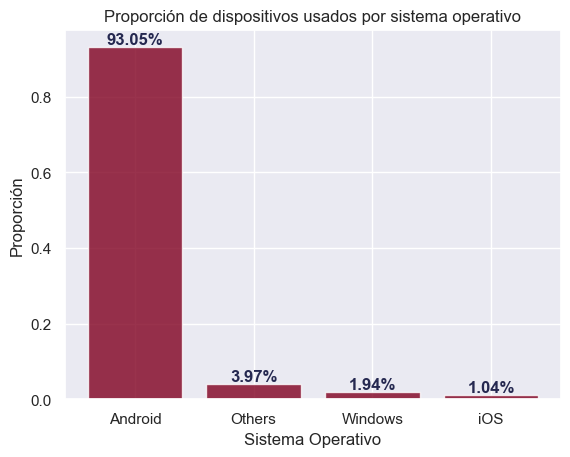

In [1254]:
##### OTRA MANERA CON GRÁFICOS
# Agrupar los datos por sistema operativo y contar cuántos dispositivos hay en cada grupo
by_os = df.groupby('os').size()
total = len(df)

# Calcular la proporción de cada grupo
proportions = by_os / total

# Crear un gráfico de barras para mostrar las proporciones
fig, ax = plt.subplots()
ax.bar(proportions.index, proportions.values, color='#800020',alpha=0.8)

# Añadir etiquetas y título al gráfico
ax.set_xlabel('Sistema Operativo')
ax.set_ylabel('Proporción')
ax.set_title('Proporción de dispositivos usados por sistema operativo')

# Añadir etiquetas de datos encima de las barras
for i, v in enumerate(proportions.values):
    ax.annotate(f"{v:.2%}", xy=(i, v), ha='center', va='bottom', fontsize=12, color='#252850', fontweight='bold', 
                xytext=(0, proportions.values.max() * 0.02), textcoords='offset points')

plt.show()

**Observaciones**

* Android conlleva el 93.05% del total de dispositivos

#### 3. La cantidad de RAM es importante para el buen funcionamiento de un dispositivo. ¿Cómo varía la cantidad de RAM según la marca?

In [1255]:
# Para ver la cantidad de RAM segun la marca, tenemos que agrupar por nombre de la marca y sacar el promedio de ram de cada marca


by_brand = df.groupby('brand_name')['ram'].mean()
print("\033[1m" + "MÁS RAM"+ "\033[0m\n",by_brand.sort_values(ascending=False).head(5)) # Ordenamos para ver las principales marcas con mayor capacidad de ram
print("\n")
print("\033[1m" + "MENOS RAM" + "\033[0m\n",by_brand.sort_values(ascending=False).tail(5))

MÁS RAM
 brand_name
OnePlus    6.363636
Oppo       4.961240
Vivo       4.756410
Huawei     4.655378
Honor      4.603448
Name: ram, dtype: float64


MENOS RAM
 brand_name
Karbonn    3.353448
Lava       3.277778
Infinix    2.600000
Nokia      2.420294
Celkon     1.613636
Name: ram, dtype: float64


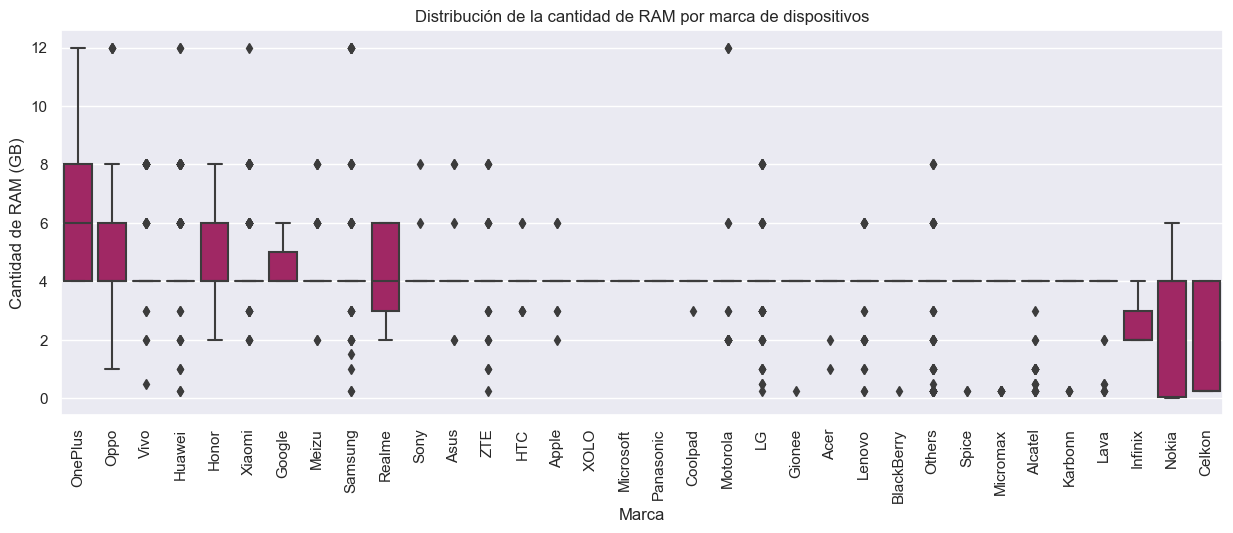

In [1256]:
# También podemos obtener el mismo resultado con un diagrama de barras o un diagrama de cajas
# Dado a que tenemos muchas variables vamos a mostrar un diagrama de caja
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram",order=df.groupby('brand_name')['ram'].mean().sort_values(ascending=False).index,color='#b41464')
plt.xticks(rotation=90)
plt.xlabel('Marca')
plt.ylabel('Cantidad de RAM (GB)')
plt.title('Distribución de la cantidad de RAM por marca de dispositivos')

plt.show()



**Observaciones**

* Podemos notar que OnePlus lidera como marca con más capacidad de ram en sus celulares usados, seguido de la marca Oppo
* Como también podemos notar que la marca con menos capacidad de ram en sus dispositivos es Celkon

#### 4. Una batería grande a menudo aumenta el peso del dispositivo, lo que hace que se sienta incómodo en las manos. ¿Cómo varía el peso de los teléfonos y tabletas que ofrecen baterías grandes (más de 4500 mAh)?

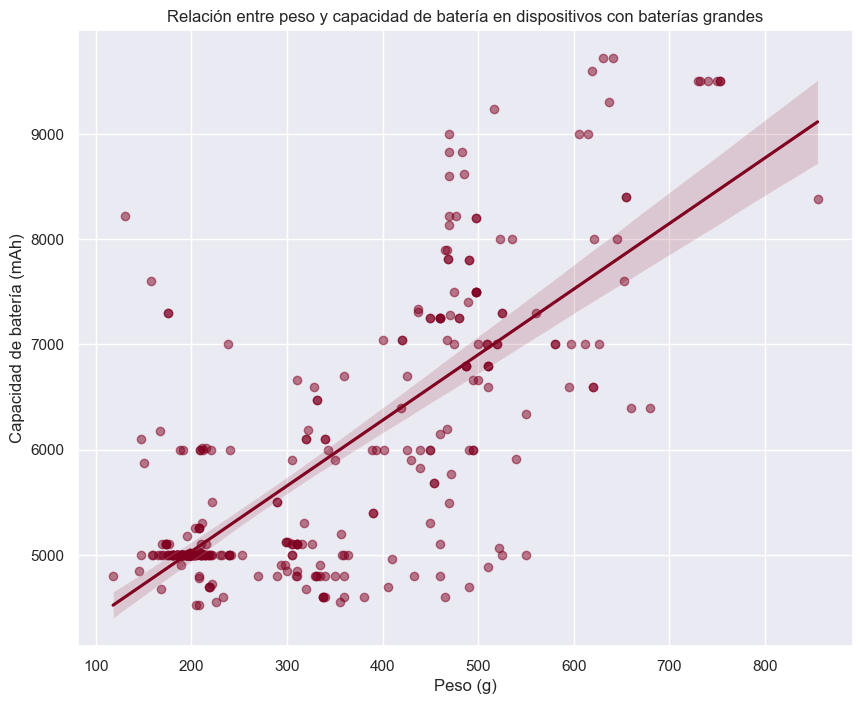

In [1257]:
# Para visualizar como varia el peso de los telefonos con la bateria para baterias mayores a 4500 tenemos que hacer un scatter plot
df2 = df.copy() #copia para no afectar los datos principales
df2['df_bat_may_4500'] = df2['battery'].apply(lambda x: 'Si' if x > 4500 else 'No')
bateria_larga_dura = df2[df2['df_bat_may_4500'] == 'Si']
plt.figure(figsize=(10, 8))
sns.regplot(x=bateria_larga_dura['weight'], y=bateria_larga_dura['battery'], color='#800020', scatter_kws={'alpha':0.5})
plt.xlabel('Peso (g)')
plt.ylabel('Capacidad de batería (mAh)')
plt.title('Relación entre peso y capacidad de batería en dispositivos con baterías grandes')
plt.show()

**Observaciones**

* Comparando el peso con respecto a la capacidad de la bateria podemos notar que a más peso más capacidad de bateria, a excepción de algunos outliers

<AxesSubplot:xlabel='weight', ylabel='Count'>

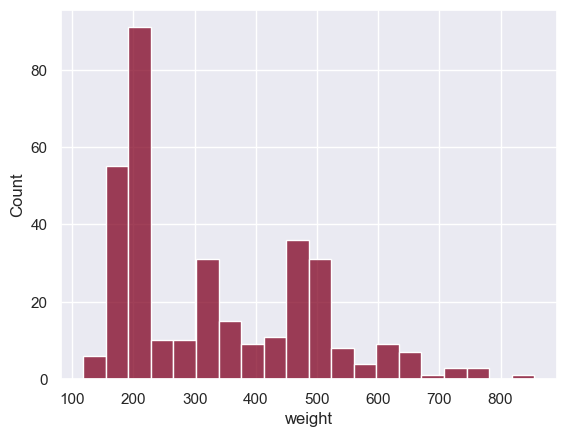

In [1258]:
sns.histplot(data=bateria_larga_dura, x="weight", bins=20, color='#800020')


**Observaciones**

* Con respecto a la cantidad, para baterias con una capacidad mayor a 4500 mAh, se encuentran con mayor cantidad en un peso promedio de 200gr 

#### 5. Las pantallas más grandes son deseables para fines de entretenimiento, ya que ofrecen una mejor experiencia de visualización. ¿Cuántos teléfonos y tabletas están disponibles en diferentes marcas con un tamaño de pantalla de más de 6 pulgadas?

In [1259]:
# Primero debemos seleccionar los datos con pantallas de más de 6 pulgadas
# 1 pulgada = 2.54 centimetros
df_pantalla_mayor_6 = df[df.screen_size > 6*2.54]
df_pantalla_mayor_6.shape

(1099, 15)

In [1260]:
# Del dataframe que extraimos realizamos un grafico para obtener la cantidad  en función a la marca
len(df_pantalla_mayor_6['brand_name'].value_counts().index)

31

<AxesSubplot:xlabel='brand_name', ylabel='count'>

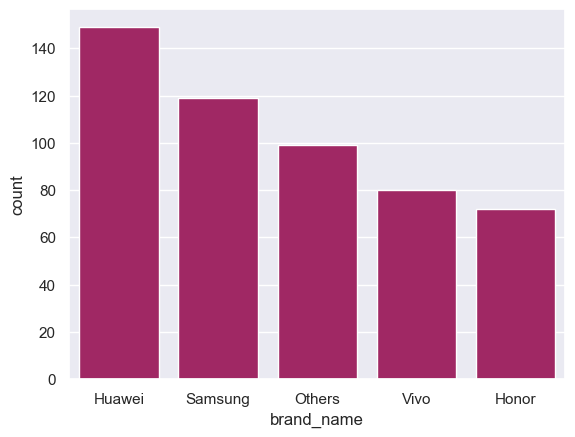

In [1261]:
# Por efectos de visualización mostramos los principales
sns.countplot(data=df_pantalla_mayor_6, x="brand_name", order=df_pantalla_mayor_6['brand_name'].value_counts().head(5).index,color='#b41464')

**Observaciones**

* Nos encontramos con 31 dispositivos entre telefonos y tablets con un tamaño mayor a 6 pulgadas
* Huawei se corona como el principal distribuidor de dispositivos con pantallas mayores a 6 pulgadas

#### 6.Hoy en día, muchos dispositivos ofrecen excelentes cámaras para selfies, lo que nos permite capturar nuestros momentos favoritos con nuestros seres queridos. ¿Cuál es la distribución de dispositivos que ofrecen cámaras para selfies de más de 8 MP entre marcas?

In [1262]:
# La pregunta es similar al problema anterior
# primero selecciono los datos con camara selfie mayor a 8MP
df_selfie_mayor_8 = df[df.selfie_camera_mp > 8]
df_selfie_mayor_8.shape

(655, 15)

<AxesSubplot:xlabel='brand_name', ylabel='count'>

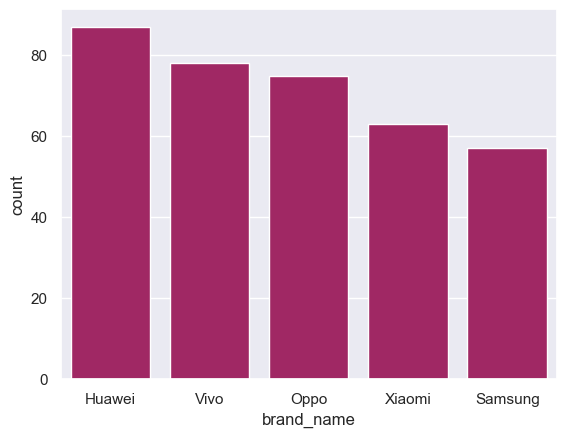

In [1263]:
# Por efectos de visualización mostramos los principales
sns.countplot(data=df_selfie_mayor_8, x="brand_name", order=df_selfie_mayor_8['brand_name'].value_counts().head(5).index,color='#b41464')

**Observaciones**

* Teniendo a la marca Huawei como el principal proveedor de dispositivos con buena camara frontal

#### 7. ¿Qué atributos están altamente correlacionados con el precio normalizado de un dispositivo usado?

In [1264]:
# las correlaciones se observan a través de un diagrama de correlaciones

# Calcular matriz de correlación
corr_matrix2 = df.corr()
corr_matrix2.reset_index(inplace=True)
corr_matrix2.drop(9, inplace=True)
corr_matrix2 = corr_matrix2[['index','normalized_used_price']].sort_values(by = 'normalized_used_price', ascending = False)
corr_matrix2 = corr_matrix2.rename(columns={'index':'variable', 'normalized_used_price':'correlacion'})
corr_matrix2[['variable','correlacion']]

,variable,correlacion
10,normalized_new_price,0.834496
0,screen_size,0.614785
5,battery,0.613619
2,selfie_camera_mp,0.608074
1,main_camera_mp,0.587302
4,ram,0.520289
7,release_year,0.509790
6,weight,0.382354
3,int_memory,0.190993
8,days_used,-0.358264


**Observaciones**

* A mi parecer los atributos altamente correlacionados son aquellos que son mayores o iguales a 0.5
* Tenemos(normalized_new_price, screen_size, battery, selfie_camera_mp, main_camera_mp, ram,  release_year)

## 4. Procesamiento de datos

- Tratamiento de valores perdidos
- Ingeniería de características (si es necesario)
- Detección y tratamiento de valores atípicos (si es necesario)
- Preparación de datos para el modelado.
- Cualquier otro paso de preprocesamiento (si es necesario)

In [1265]:
# Creamos una copia para no modificar lo anterior
df3 = df.copy()

#### Ingeniería de características (si es necesario)

In [1266]:
df3["years_of_use"] = 2023 - df3["release_year"]
df3.drop("release_year", axis=1, inplace=True) # Elimino la columna porque ya no va a ser necesario
df3["years_of_use"].describe()

count    3454.000000
mean        7.034742
std         2.298455
min         3.000000
25%         5.000000
50%         7.500000
75%         9.000000
max        10.000000
Name: years_of_use, dtype: float64

* No es recomendable usar años para un modelo, en lugar de ello se usa cantidad de años en uso
* Estoy tomando como referencia el año actual (2023)

#### Detección y tratamiento de valores atípicos

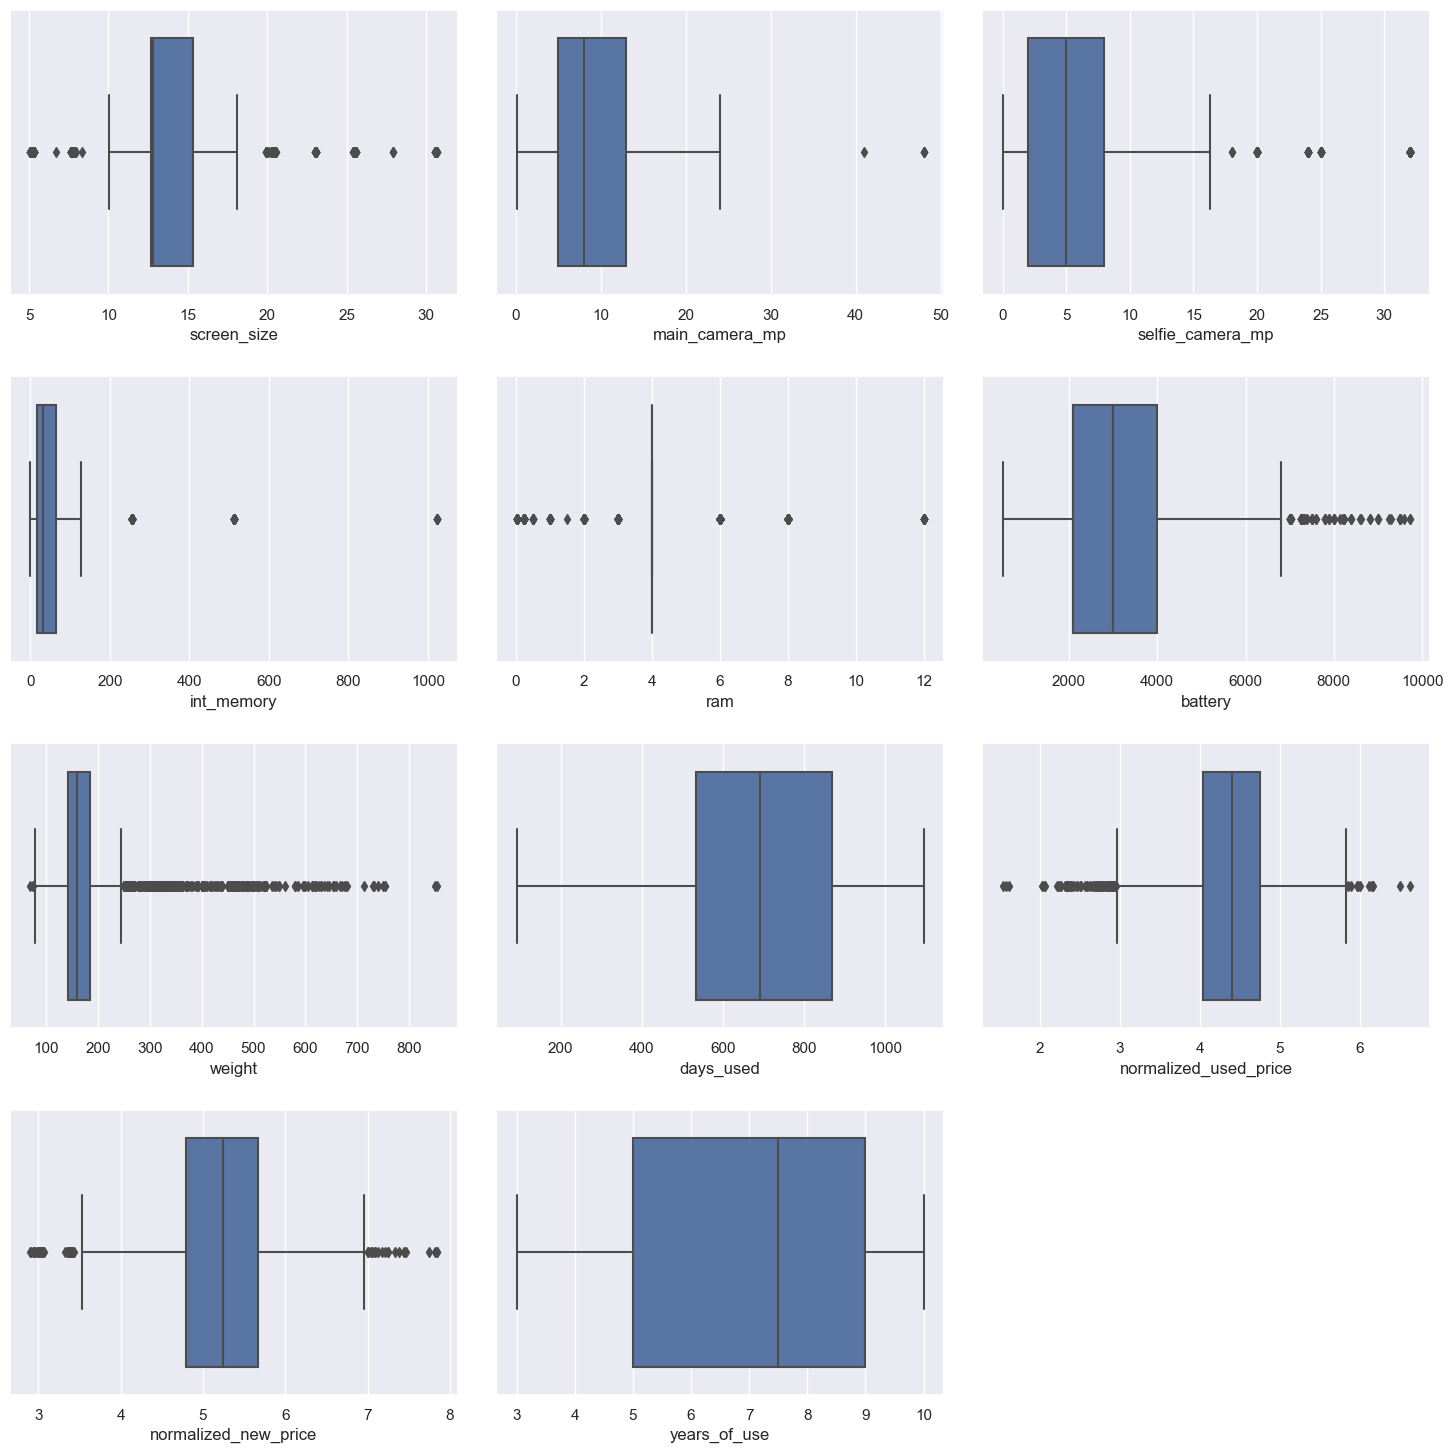

In [1267]:
# Primero vamos a comprobar los valores atipicos
num_cols = df3.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df3, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* Detectamos valores atipicos a excepción de las variables "days_used", "years_of_use"

In [1268]:
# mostramos el cuadro estadistico anterior
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
1,main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000,0.051824
6,weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000,0.002027
5,battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000,0.001737
3,int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000,0.001158
4,ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000,0.001158
2,selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000,0.000579
0,screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000,0.000000
7,release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000,0.000000
8,days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000,0.000000
9,normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433,0.000000


In [1269]:
# PRIMERO -> Vamos a usar Transformacion en logaritmo, solo para aquellos valores que tengan cola hacia la derecha

#En Train
df3["screen_size"] = np.log(df3["screen_size"]) # Se le suma 1 a aquellos que comienzan en "0", porque log(0) es -inf y eso da error a mi modelo
df3["main_camera_mp"] = np.log(df3["main_camera_mp"]+1) 
df3["selfie_camera_mp"] = np.log(df3["selfie_camera_mp"]+1)
df3["int_memory"] = np.log(df3["int_memory"]+1)
df3["battery"] = np.log(df3["battery"])
df3["weight"] = np.log(df3["weight"])

In [1270]:
univariate_II = df3.describe().transpose().reset_index()
univariate_II

,index,count,mean,std,min,25%,50%,75%,max
0,screen_size,3454.0,2.580292,0.281081,1.625311,2.541602,2.551786,2.730464,3.424588
1,main_camera_mp,3275.0,2.213280,0.573792,0.076961,1.791759,2.197225,2.639057,3.891820
2,selfie_camera_mp,3452.0,1.640279,0.892240,0.000000,1.098612,1.791759,2.197225,3.496508
3,int_memory,3450.0,3.539693,0.902474,0.009950,2.833213,3.496508,4.174387,6.932448
4,ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
5,battery,3448.0,7.969274,0.404659,6.214608,7.649693,8.006368,8.294050,9.181941
6,weight,3447.0,5.136474,0.342309,4.234107,4.955827,5.075174,5.220356,6.751101
7,days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
8,normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433
9,normalized_new_price,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841


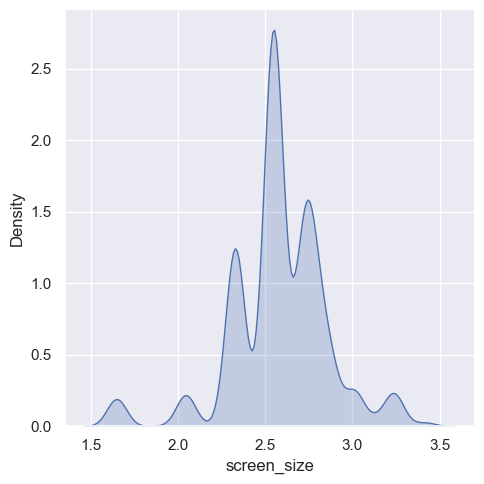

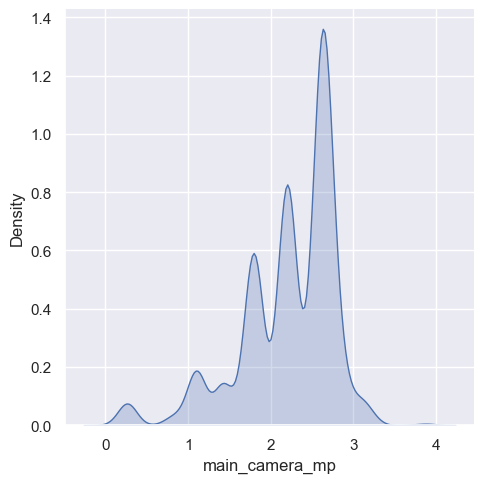

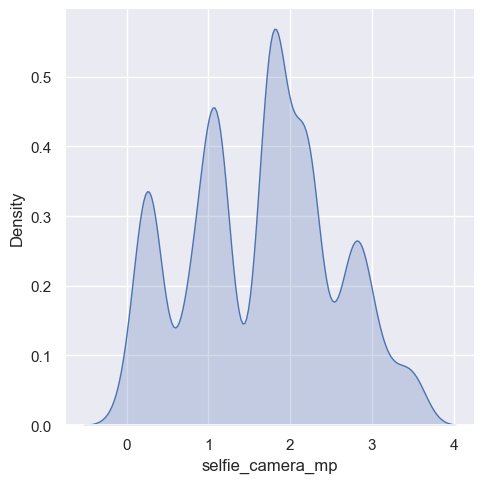

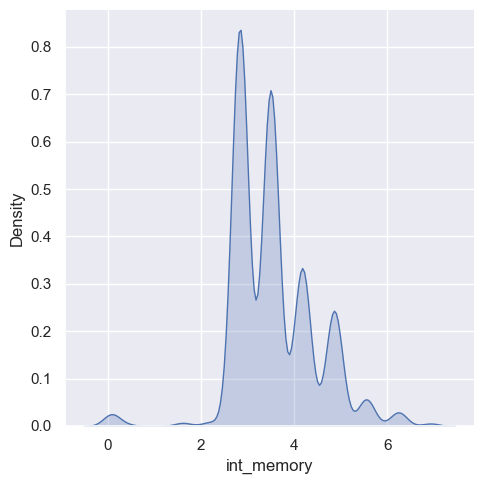

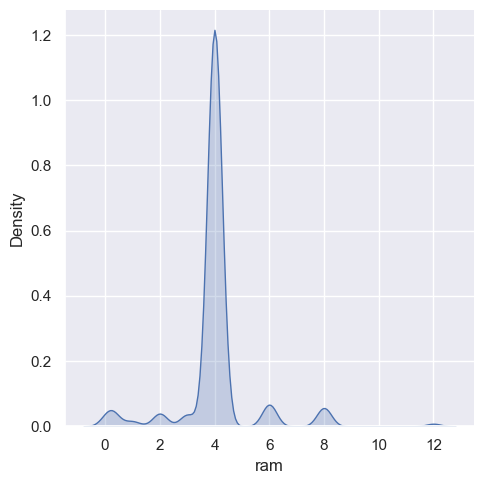

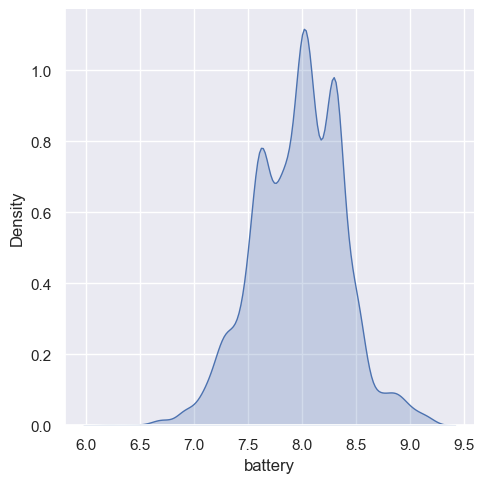

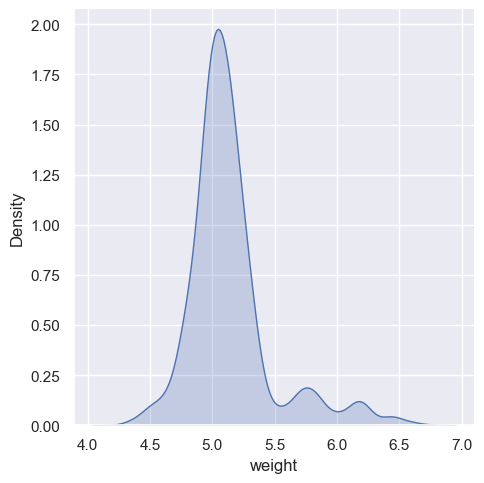

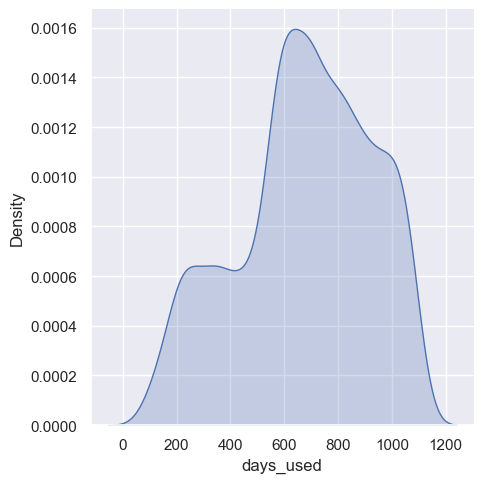

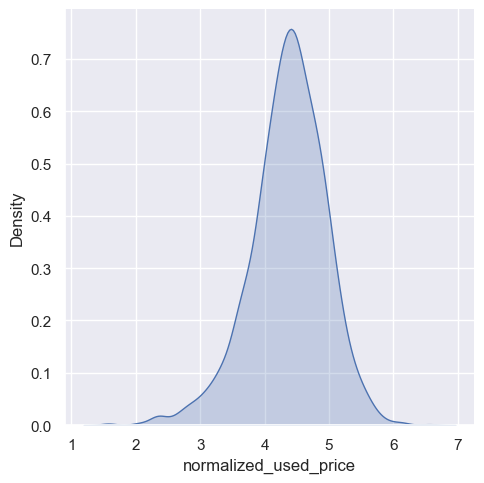

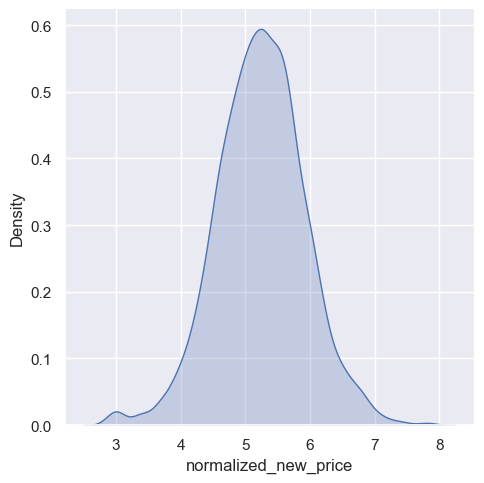

In [1271]:
for i in df_numericas:
    # Gráfico de distribución 
    sns.displot(df3[i], kind="kde", fill=True)

* Ahora si notamos que la mayoria de los valores siguen una DISTRIBUCIÓN NORMAL

In [1272]:
# SEGUNDO -> Vamos a usar la tecnica de z-score con un porcentaje del 95%
# LI = Mean - Z*desviacion_estandar
# LS = Mean + Z*desviacion_estandar
# Z = 1.96 (95% confianza)

univariate_II['li_zscore'] = univariate_II['mean'] - 1.96*univariate_II['std']
univariate_II['ls_zscore'] = univariate_II['mean'] + 1.96*univariate_II['std']

univariate_II.head()

,index,count,mean,std,min,25%,50%,75%,max,li_zscore,ls_zscore
0,screen_size,3454.0,2.580292,0.281081,1.625311,2.541602,2.551786,2.730464,3.424588,2.029373,3.131211
1,main_camera_mp,3275.0,2.213280,0.573792,0.076961,1.791759,2.197225,2.639057,3.891820,1.088647,3.337912
2,selfie_camera_mp,3452.0,1.640279,0.892240,0.000000,1.098612,1.791759,2.197225,3.496508,-0.108512,3.389070
3,int_memory,3450.0,3.539693,0.902474,0.009950,2.833213,3.496508,4.174387,6.932448,1.770844,5.308543
4,ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000,1.360517,6.711727


In [1273]:
# Extraigo las columnas para recorrerlas despues
columnas = univariate_II['index'].tolist()
columnas

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price',
 'years_of_use']

In [1274]:
# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, columnas):
    for col in columnas:
        desc = univariate.loc[univariate['index'] == col]
        dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                                else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                                else x)
    return dataframe

In [1275]:
df4 = zscore(df3, univariate_II, columnas)
df4

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,...,main_camera_mp_tzscore,selfie_camera_mp_tzscore,int_memory_tzscore,ram_tzscore,battery_tzscore,weight_tzscore,days_used_tzscore,normalized_used_price_tzscore,normalized_new_price_tzscore,years_of_use_tzscore
0,Honor,Android,2.674149,yes,no,2.639057,1.791759,4.174387,3.0,8.013012,...,2.639057,1.791759,4.174387,3.000000,8.013012,4.983607,187.652591,4.307572,4.715100,3
1,Honor,Android,2.850707,yes,yes,2.639057,2.833213,4.859812,8.0,8.366370,...,2.639057,2.833213,4.859812,6.711727,8.366370,5.361292,325.000000,5.162097,5.519018,3
2,Honor,Android,2.814810,yes,yes,2.639057,2.197225,4.859812,8.0,8.342840,...,2.639057,2.197225,4.859812,6.711727,8.342840,5.361292,187.652591,5.111084,5.884631,3
3,Honor,Android,3.238678,yes,yes,2.639057,2.197225,4.174387,6.0,8.888757,...,2.639057,2.197225,4.174387,6.000000,8.762405,5.807399,345.000000,5.135387,5.630961,3
4,Honor,Android,2.729159,yes,no,2.639057,2.197225,4.174387,3.0,8.517193,...,2.639057,2.197225,4.174387,3.000000,8.517193,5.220356,293.000000,4.389995,4.947837,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,2.730464,yes,no,NaN,2.197225,4.174387,6.0,8.517193,...,NaN,2.197225,4.174387,6.000000,8.517193,5.247024,232.000000,4.492337,6.483872,4
3450,Asus,Android,2.723924,yes,no,2.639057,2.197225,4.859812,8.0,8.294050,...,2.639057,2.197225,4.859812,6.711727,8.294050,5.298317,541.000000,5.037732,6.251538,5
3451,Alcatel,Android,2.760010,yes,no,2.639057,1.791759,3.496508,3.0,8.294050,...,2.639057,1.791759,3.496508,3.000000,8.294050,5.105945,201.000000,4.357350,4.528829,3
3452,Alcatel,Android,2.760010,yes,no,2.639057,1.791759,3.496508,2.0,8.294050,...,2.639057,1.791759,3.496508,2.000000,8.294050,5.075174,187.652591,4.349762,4.624188,3


In [1276]:
cat_feats = df4.select_dtypes(include = 'object').columns.tolist() #Variables categóricas

columnas_z = list(set(df4.columns.tolist()) - set(columnas + cat_feats))
columnas_z

['main_camera_mp_tzscore',
 'normalized_new_price_tzscore',
 'ram_tzscore',
 'days_used_tzscore',
 'battery_tzscore',
 'years_of_use_tzscore',
 'screen_size_tzscore',
 'normalized_used_price_tzscore',
 'selfie_camera_mp_tzscore',
 'weight_tzscore',
 'int_memory_tzscore']

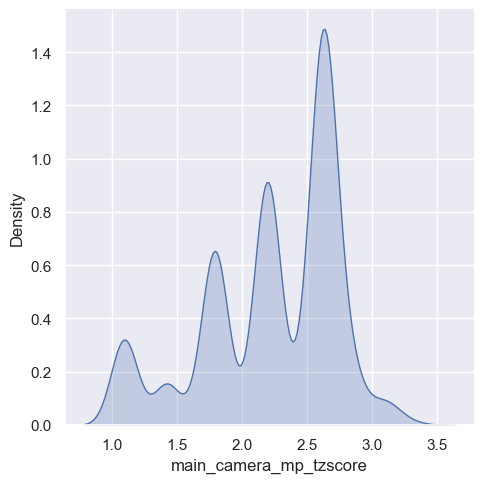

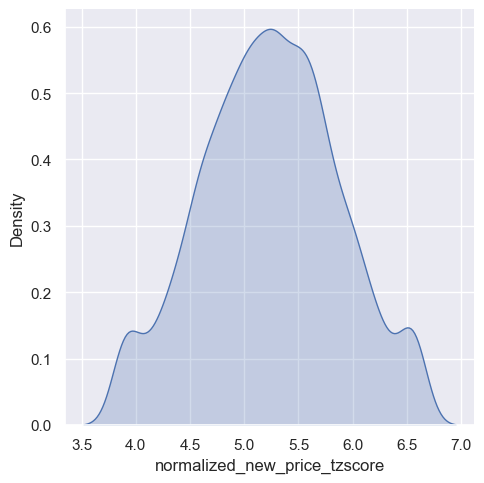

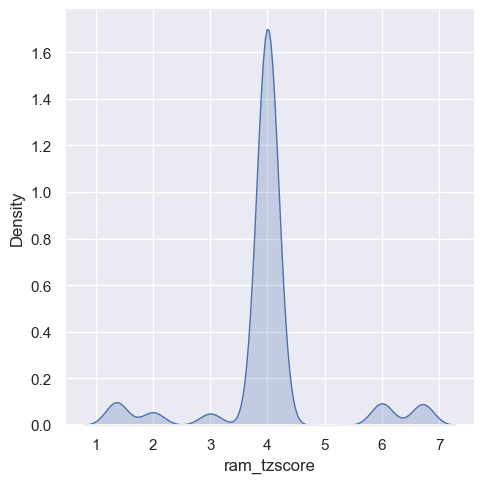

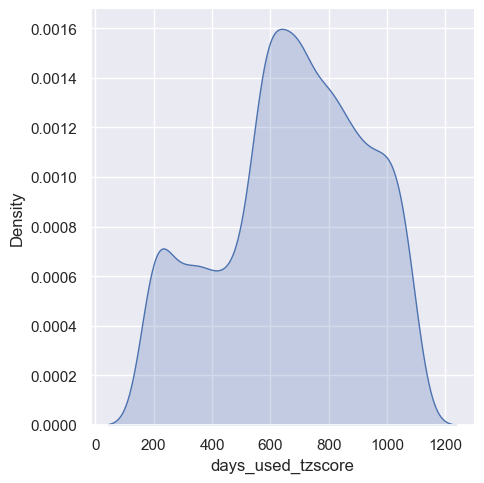

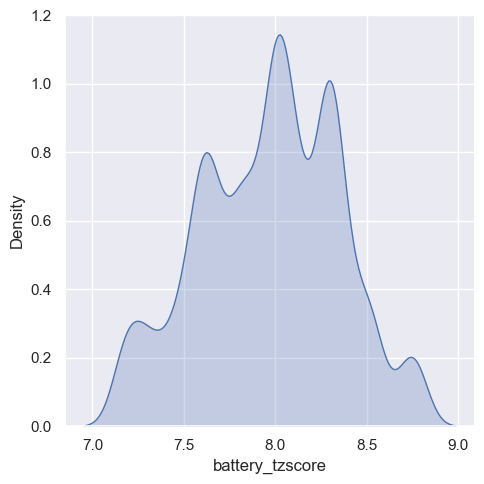

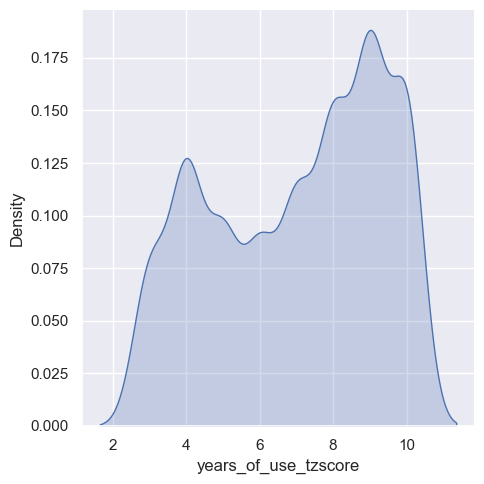

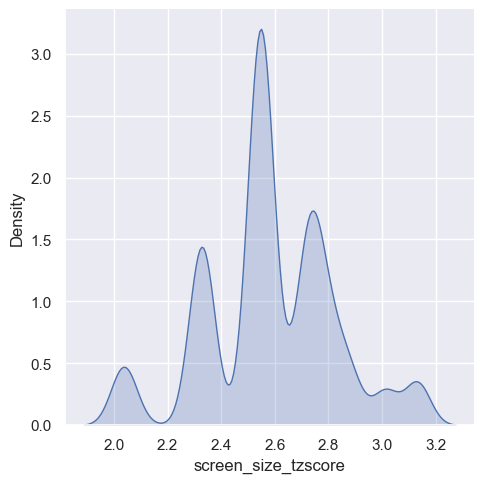

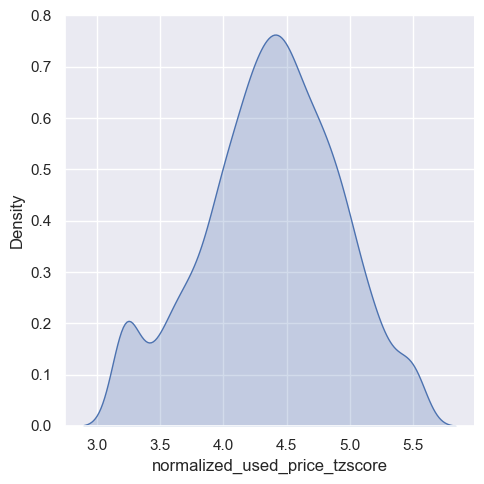

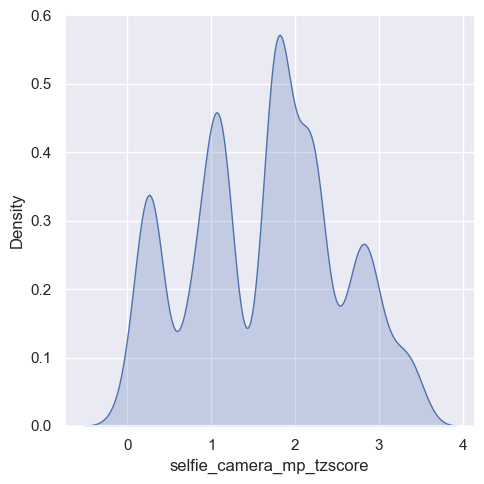

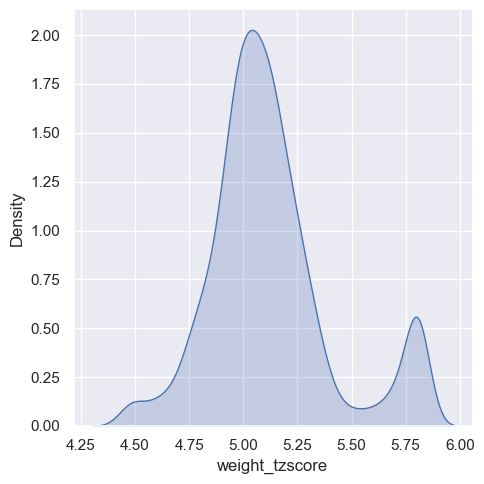

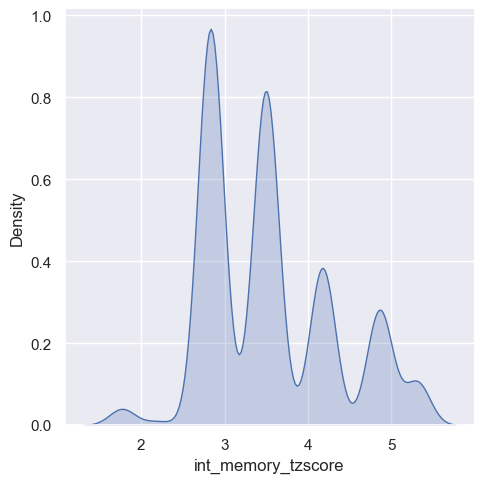

In [1277]:
for i in columnas_z:
    # Gráfico de distribución 
    sns.displot(df4[i], kind="kde", fill=True)

* Obtenemos los limites superior e inferior de cada variable

In [1278]:
df4[columnas_z].describe().T

,count,mean,std,min,25%,50%,75%,max
main_camera_mp_tzscore,3275.0,2.232441,0.516182,1.088647,1.791759,2.197225,2.639057,3.337912
normalized_new_price_tzscore,3454.0,5.235695,0.634979,3.893179,4.790342,5.245892,5.673718,6.573035
ram_tzscore,3450.0,4.006052,0.974167,1.360517,4.000000,4.000000,4.000000,6.711727
days_used_tzscore,3454.0,676.077892,246.037563,187.652591,533.500000,690.500000,868.750000,1094.000000
battery_tzscore,3448.0,7.969479,0.380841,7.176143,7.649693,8.006368,8.294050,8.762405
years_of_use_tzscore,3454.0,7.034742,2.298455,3.000000,5.000000,7.500000,9.000000,10.000000
screen_size_tzscore,3454.0,2.586093,0.241713,2.029373,2.541602,2.551786,2.730464,3.131211
normalized_used_price_tzscore,3454.0,4.376363,0.539912,3.210441,4.033931,4.405133,4.755700,5.518983
selfie_camera_mp_tzscore,3452.0,1.637353,0.886304,0.000000,1.098612,1.791759,2.197225,3.389070
weight_tzscore,3447.0,5.116916,0.282255,4.465549,4.955827,5.075174,5.220356,5.807399


#### Tratamiento de valores perdidos

In [1279]:
# Verificación de valores nulos
df5 = df4[columnas_z].copy()
df5.isna().sum()

main_camera_mp_tzscore           179
normalized_new_price_tzscore       0
ram_tzscore                        4
days_used_tzscore                  0
battery_tzscore                    6
years_of_use_tzscore               0
screen_size_tzscore                0
normalized_used_price_tzscore      0
selfie_camera_mp_tzscore           2
weight_tzscore                     7
int_memory_tzscore                 4
dtype: int64

* Vemos que se presentan misings con una cantidad pequeña para tratarlos

In [1280]:
# Al ser variables numericas, se procede a hacer la imputación de la media

# Obtener las columnas con valores nulos
null_cols =df5.columns[df5.isnull().any()]


for col in null_cols:
    median = df5[col].median()
    df5[col] = df5[col].fillna(median)

In [1281]:
df5.isna().sum()

main_camera_mp_tzscore           0
normalized_new_price_tzscore     0
ram_tzscore                      0
days_used_tzscore                0
battery_tzscore                  0
years_of_use_tzscore             0
screen_size_tzscore              0
normalized_used_price_tzscore    0
selfie_camera_mp_tzscore         0
weight_tzscore                   0
int_memory_tzscore               0
dtype: int64

In [1282]:
#ESTANDARIZACIÓN
df6 = (df5 - df5.mean())/df5.std()
df6

,main_camera_mp_tzscore,normalized_new_price_tzscore,ram_tzscore,days_used_tzscore,battery_tzscore,years_of_use_tzscore,screen_size_tzscore,normalized_used_price_tzscore,selfie_camera_mp_tzscore,weight_tzscore,int_memory_tzscore
0,0.812518,-0.819861,-1.033322,-1.985166,0.114239,-1.755415,0.364299,-0.127412,0.174162,-0.472471,0.812869
1,0.812518,0.446193,2.779043,-1.426928,1.042875,-1.755415,1.094741,1.455299,1.349545,0.866956,1.689302
2,0.812518,1.021980,2.779043,-1.985166,0.981036,-1.755415,0.946232,1.360816,0.631769,0.866956,1.689302
3,0.812518,0.622487,2.048018,-1.345640,2.083665,-1.755415,2.255223,1.405828,0.631769,2.449034,0.812869
4,0.812518,-0.453333,-1.033322,-1.556989,1.439242,-1.755415,0.591884,0.025247,0.631769,0.367138,0.812869
...,...,...,...,...,...,...,...,...,...,...,...
3449,-0.066427,1.965697,2.048018,-1.804919,1.439242,-1.320340,0.597282,0.214802,0.631769,0.461715,0.812869
3450,0.812518,1.599805,2.779043,-0.549013,0.852814,-0.885265,0.570224,1.224956,0.631769,0.643622,1.689302
3451,0.812518,-1.113211,-1.033322,-1.930916,0.852814,-1.755415,0.719518,-0.035216,0.174162,-0.038608,-0.053916
3452,0.812518,-0.963034,-2.060436,-1.985166,0.852814,-1.755415,0.719518,-0.049271,0.174162,-0.147736,-0.053916


## EDA

- Es una buena idea explorar los datos una vez más después de manipularlos.

In [1283]:
df6.describe(include="all").T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,main_camera_mp_tzscore,3454.0,1.236785e-13,1.0,-2.271738,-0.873025,-0.066427,0.812518,2.202762
1,normalized_new_price_tzscore,3454.0,6.146470e-15,1.0,-2.114267,-0.701366,0.016059,0.689824,2.106117
2,ram_tzscore,3454.0,5.291270e-15,1.0,-2.717258,-0.006209,-0.006209,-0.006209,2.779043
3,days_used_tzscore,3454.0,9.865749e-15,1.0,-1.985166,-0.579496,0.058618,0.783100,1.698611
4,battery_tzscore,3454.0,-7.633802e-14,1.0,-2.085078,-0.840575,0.096777,0.852814,2.083665
5,years_of_use_tzscore,3454.0,-1.009165e-15,1.0,-1.755415,-0.885265,0.202422,0.855034,1.290109
6,screen_size_tzscore,3454.0,-8.852694e-14,1.0,-2.303223,-0.184064,-0.141931,0.597282,2.255223
7,normalized_used_price_tzscore,3454.0,2.573892e-14,1.0,-2.159468,-0.634238,0.053285,0.702590,2.116308
8,selfie_camera_mp_tzscore,3454.0,-1.714787e-15,1.0,-1.848015,-0.608123,0.174162,0.631769,1.976884
9,weight_tzscore,3454.0,-7.909782e-14,1.0,-2.309713,-0.570989,-0.147736,0.367138,2.449034


#### Preparación de datos para el modelado.

- Queremos predecir el precio normalizado de los dispositivos usados
- Antes de proceder a la construcción de un modelo, tendremos que codificar las características categóricas
- Dividiremos los datos en entrenamiento y prueba para poder evaluar el modelo que construyamos con los datos de entrenamiento
- Construiremos un modelo de regresión lineal con los datos de entrenamiento y luego comprobaremos su rendimiento

#### Tratar las variables categoricas

In [1284]:
df_cat = pd.get_dummies(df, columns = df_categoricas, drop_first=True)   #drop_first=True, Elimina la columna con las variables categoricas para dar paso a las columnas con variables numericas
df_cat = df_cat.drop(df_numericas,axis=1)
df_cat = df_cat.drop('release_year',axis=1)
df_cat

,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3450,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3452,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1285]:
df_final = pd.concat([df6.reset_index(drop=True), df_cat.reset_index(drop=True) ],axis = 1)   # drop=True -> Indica que no se debe crear una nueva columna con los valores antiguos de los indices
df_final


,main_camera_mp_tzscore,normalized_new_price_tzscore,ram_tzscore,days_used_tzscore,battery_tzscore,years_of_use_tzscore,screen_size_tzscore,normalized_used_price_tzscore,selfie_camera_mp_tzscore,weight_tzscore,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,0.812518,-0.819861,-1.033322,-1.985166,0.114239,-1.755415,0.364299,-0.127412,0.174162,-0.472471,...,0,0,0,0,0,0,0,0,1,0
1,0.812518,0.446193,2.779043,-1.426928,1.042875,-1.755415,1.094741,1.455299,1.349545,0.866956,...,0,0,0,0,0,0,0,0,1,1
2,0.812518,1.021980,2.779043,-1.985166,0.981036,-1.755415,0.946232,1.360816,0.631769,0.866956,...,0,0,0,0,0,0,0,0,1,1
3,0.812518,0.622487,2.048018,-1.345640,2.083665,-1.755415,2.255223,1.405828,0.631769,2.449034,...,0,0,0,0,0,0,0,0,1,1
4,0.812518,-0.453333,-1.033322,-1.556989,1.439242,-1.755415,0.591884,0.025247,0.631769,0.367138,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,-0.066427,1.965697,2.048018,-1.804919,1.439242,-1.320340,0.597282,0.214802,0.631769,0.461715,...,0,0,0,0,0,0,0,0,1,0
3450,0.812518,1.599805,2.779043,-0.549013,0.852814,-0.885265,0.570224,1.224956,0.631769,0.643622,...,0,0,0,0,0,0,0,0,1,0
3451,0.812518,-1.113211,-1.033322,-1.930916,0.852814,-1.755415,0.719518,-0.035216,0.174162,-0.038608,...,0,0,0,0,0,0,0,0,1,0
3452,0.812518,-0.963034,-2.060436,-1.985166,0.852814,-1.755415,0.719518,-0.049271,0.174162,-0.147736,...,0,0,0,0,0,0,0,0,1,0


In [1286]:
# CAMBIAMOS EL NOMBRE DE LAS VARIABLES QUE TERMINAN CON _tzscore
# Obtener todas las columnas que terminan con '_tzscore'
tzscore_cols = [col for col in df_final.columns if col.endswith('_tzscore')]

# Eliminar '_tzscore' de cada columna
for col in tzscore_cols:
    new_col_name = col.replace('_tzscore', '')
    df_final.rename(columns={col: new_col_name}, inplace=True)

df_final

,main_camera_mp,normalized_new_price,ram,days_used,battery,years_of_use,screen_size,normalized_used_price,selfie_camera_mp,weight,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,0.812518,-0.819861,-1.033322,-1.985166,0.114239,-1.755415,0.364299,-0.127412,0.174162,-0.472471,...,0,0,0,0,0,0,0,0,1,0
1,0.812518,0.446193,2.779043,-1.426928,1.042875,-1.755415,1.094741,1.455299,1.349545,0.866956,...,0,0,0,0,0,0,0,0,1,1
2,0.812518,1.021980,2.779043,-1.985166,0.981036,-1.755415,0.946232,1.360816,0.631769,0.866956,...,0,0,0,0,0,0,0,0,1,1
3,0.812518,0.622487,2.048018,-1.345640,2.083665,-1.755415,2.255223,1.405828,0.631769,2.449034,...,0,0,0,0,0,0,0,0,1,1
4,0.812518,-0.453333,-1.033322,-1.556989,1.439242,-1.755415,0.591884,0.025247,0.631769,0.367138,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,-0.066427,1.965697,2.048018,-1.804919,1.439242,-1.320340,0.597282,0.214802,0.631769,0.461715,...,0,0,0,0,0,0,0,0,1,0
3450,0.812518,1.599805,2.779043,-0.549013,0.852814,-0.885265,0.570224,1.224956,0.631769,0.643622,...,0,0,0,0,0,0,0,0,1,0
3451,0.812518,-1.113211,-1.033322,-1.930916,0.852814,-1.755415,0.719518,-0.035216,0.174162,-0.038608,...,0,0,0,0,0,0,0,0,1,0
3452,0.812518,-0.963034,-2.060436,-1.985166,0.852814,-1.755415,0.719518,-0.049271,0.174162,-0.147736,...,0,0,0,0,0,0,0,0,1,0


In [1287]:
# Definición de las variables dependientes e independientes
X = df_final.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

In [1288]:
# Hacemos la división de train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1289]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Construyendo el modelo - Regresión Lineal

In [1290]:
modelo_1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(modelo_1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     253.6
Date:                   Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                           14:25:20   Log-Likelihood:                 34.815
No. Observations:                   2417   AIC:                             28.37
Df Residuals:                       2368   BIC:                             312.1
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observaciones**

* Tenemos un R cuadrado igual a 0.837, lo cual indica que el 83.7% de la varianza en la variable de respuesta puede explicarse por las variables predictoras incluidas en el modelo.
* Notamos por el P-valor que hay variables con un valor mayor a 0.05, lo que indica que son estadisticamente insignificantes para el modelo

## Comprobación del rendimiento del modelo

Por lo general se utilizan el error cuadrático medio (RMSE), error absoluto medio (MAE), R cuadrado, R cuadrado ajustado y MAPE.

In [1291]:
# Función que calcula el R cuadrado ajustado
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Función del error porcentual absoluto medio
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Diferenciar el performance
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # R-cuadrado
    adjr2 = adj_r2_score(predictors, target, pred)  # R-cuadrado ajustado
    rmse = np.sqrt(mean_squared_error(target, pred))  # raíz cuadrada del error cuadrático medio
    mae = mean_absolute_error(target, pred)  # Error absoluto medio
    mape = mape_score(target, pred)  # Error porcentual absoluto medio

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [1292]:
print("Metricas de rendimiento para datos de entrenamiento\n")
modelo_1_train_perf = model_performance_regression(modelo_1, sm.add_constant(x_train), y_train)
modelo_1_train_perf

Metricas de rendimiento para datos de entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23851,0.181784,0.837158,0.833787,4.390634


In [1293]:
print("Metricas de rendimiento para datos de testing\n")
modelo_1_test_perf = model_performance_regression(modelo_1, sm.add_constant(x_test), y_test)
modelo_1_test_perf

Metricas de rendimiento para datos de testing



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244341,0.189353,0.824681,0.815978,4.527096


**Observaciones**

* RMSE nos dice cuánto varían los errores de predicción. En este caso, el valor de RMSE es 0.244, lo que significa que en promedio, nuestras predicciones se desvían en 0.244 unidades de la variable objetivo.
* MAE nos dice cuánto difieren nuestras predicciones de los valores reales. En este caso, el valor de MAE es 0.189, lo que significa que en promedio, nuestras predicciones se desvían en 0.189 unidades de la variable objetivo.
* Un valor de R-cuadrado de 0.824 indica que el modelo explica el 82.4% de la variabilidad en la variable objetivo.
* Adj. R-squared es una versión ajustada de R-cuadrado que toma en cuenta el número de variables independientes utilizadas en el modelo. En este caso, el valor es 0.815, lo que sugiere que el modelo ajustado explica el 81.5% de la variabilidad en la variable objetivo.
* MAPE, En este caso, el valor de MAPE es 4.5%, lo que significa que en promedio, nuestras predicciones difieren en un 4.5% de la variable objetivo.

## Comprobación de supuestos de regresión lineal

- Para hacer inferencias estadísticas a partir de un modelo de regresión lineal, es importante asegurarse de que se cumplan los supuestos de la regresión lineal.

### multicolinealidad

* Utilizada para verificar si hay correlación alta entre las variables independientes
* Utilizamos VIF(Factor de inflación de varianza)
* Tambien se puede usar la matriz de correlación, sin embargo se tendría que revisar y comparar uno por uno

In [1294]:
# VIF > 5 & VID < 10, significa colinealidad moderada
# VIF > 10, significa colinealidad alta
def checking_vif(varsIndepen):
    vif = pd.DataFrame()
    vif["var_Independiente"] = varsIndepen.columns  #guardamos las columnas de los predictores
    vif["VIF"] = [variance_inflation_factor(varsIndepen.values, i) for i in range(len(varsIndepen.columns))]
    return vif

In [1295]:
# Revisamos el VIF las variables numericas
checking_vif(sm.add_constant(x_train))

,var_Independiente,VIF
0,const,83.440908
1,main_camera_mp,2.992453
2,normalized_new_price,3.463475
3,ram,1.993394
4,days_used,2.555580
5,battery,5.126178
6,years_of_use,5.933502
7,screen_size,6.216972
8,selfie_camera_mp,5.053229
9,weight,5.072315


* Presencial de colinealidad en algunas variables

In [1296]:
def tratamiento_multicolinealidad(predictors, target, high_vif_columns):
    """
    predictors: df de las variables independientes
    target: serie que contiene la variable dependiente (objetivo).
    high_vif_columns: lista que contiene los nombres de las columnas con alto VIF
    """
    # Listas para almacenar valores de R-cuadrado y RMSE
    adj_r2 = []
    rmse = []

    # Itero a través de cada columna en high_vif_columns para eliminarla del conjunto de datos de entrenamiento.
    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # Creamos un nuevo modelo de regresió lineal
        olsmodel = sm.OLS(target, train).fit()

        # Almaceno los nuevos valores de R-cuadrado y RMSE del nuevo modelo
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # Creando dataframe ordenando por resultados Ajd R-squared after_dropping
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    # Retornamos el df
    return temp

In [1297]:
col_list = [
    "screen_size", #6.216972
    "years_of_use", #5.933502
    "battery",  #5.126178
    "selfie_camera_mp", #5.053229
    "weigh" # 5.072315
]



res = tratamiento_multicolinealidad(sm.add_constant(x_train), y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_of_use,0.833589,0.241160
1,battery,0.833419,0.241283
2,weigh,0.830308,0.243526
3,selfie_camera_mp,0.828348,0.244928
4,screen_size,0.826237,0.246430


In [1298]:
# Eliminamos la primera variable
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Revisarmos el nuevo VIF
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,var_Independiente,VIF
0,main_camera_mp,2.974121
1,normalized_new_price,3.438347
2,ram,1.993140
3,days_used,2.547454
4,battery,4.639850
5,years_of_use,5.806625
6,selfie_camera_mp,5.037231
7,weight,3.068597
8,int_memory,2.217394
9,brand_name_Alcatel,1.234035


* Notamos una mejora con respecto a weight

In [1299]:
# Eliminamos la segunda variable
col_to_drop = "years_of_use"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Revisarmos el nuevo VIF
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_of_use


,var_Independiente,VIF
0,main_camera_mp,2.973992
1,normalized_new_price,3.030828
2,ram,1.979517
3,days_used,1.829125
4,battery,4.460336
5,selfie_camera_mp,4.033855
6,weight,3.068562
7,int_memory,2.110475
8,brand_name_Alcatel,1.230502
9,brand_name_Apple,10.276081


* Ya no tenemos nunguna variable numerica con un VIF > 5

### Variables con un p-valor alto (>0.05)

* Las variables con p-valor mayo a 0.05 hacen referencia que estadisticamente no aportan valor al modelo
* De manera similar como el VIF vamos a tener que selección y eliminar variable por variable con el p-valor más alto y ver como varia con respecto a las demas variables, hasta llegar a tener valores  con un p-valor < 0.05

In [1300]:
# Código para la selección de caracteristicas en un modelo de regresión lineal segun su p-valor

# Lista inicial de columnas 
predictors = x_train3.copy()
cols = predictors.columns.tolist()

# Establecer un p-valor maximo inicial
max_p_value = 1

while len(cols) > 0:
    # definimos el train set
    x_train_aux = predictors[cols]  
    
    # Entrenamos el modelo
    model = sm.OLS(y_train,sm.add_constant(x_train_aux)).fit()

    # Obtener los valores p y el valor p máximo
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Nombre de la variable con p-valor máximo
    feature_with_p_max = p_values.idxmax()
    
#     print(feature_with_p_max)

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'normalized_new_price', 'ram', 'days_used', 'selfie_camera_mp', 'weight', 'int_memory', 'brand_name_Apple', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Others', 'brand_name_Xiaomi', 'os_Others', 'os_iOS']


In [1301]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [1302]:
modelo_2 = sm.OLS(y_train,sm.add_constant(x_train4)).fit()
print(modelo_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.827
Model:                               OLS   Adj. R-squared:                  0.826
Method:                    Least Squares   F-statistic:                     821.3
Date:                   Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                           14:25:45   Log-Likelihood:                -36.992
No. Observations:                   2417   AIC:                             104.0
Df Residuals:                       2402   BIC:                             190.8
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1303]:
print("Metricas de rendimiento para datos de entrenamiento\n")
modelo_2_train_perf = model_performance_regression(modelo_2, sm.add_constant(x_train4), y_train)
modelo_2_train_perf

Metricas de rendimiento para datos de entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.245703,0.186286,0.827189,0.82611,4.512102


In [1304]:
print("Metricas de rendimiento para datos de entrenamiento\n")
modelo_2_test_perf = model_performance_regression(modelo_2, sm.add_constant(x_test4), y_test)
modelo_2_test_perf

Metricas de rendimiento para datos de entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2452,0.191482,0.823447,0.820853,4.588268


**Observaciones**

* La eliminación de las variables con p-valor > 0.05 no afecta al rendimiento del modelo

### Prueba de linealidad e independencia

* La prueba de linealidad se realiza para evaluar su hay una relación lineal entre las v.independientes y la v.dependiente en un modelo de regresión lineal
* La prueba de independencia se realiza para verificar si los errores del modelo no están correlacionados entre sí. Para ellos utilizaremos un grafico de residuos del modelo y verificar que no haya patrones o estructuras notables en los residuos

In [1305]:
# Creamos un dataframe con los valores reales, valores del modelo, y los residuos
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = modelo_2.fittedvalues  # valores ajustados del modelo de regresión
df_pred["Residuals"] = modelo_2.resid  # los residuos, diferencia entre valores reales y valores ajustados

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.246216,0.015759
3141,4.175156,4.026560,0.148596
1233,4.117410,4.579955,-0.462545
3046,3.782597,3.886504,-0.103906
2649,3.981922,3.943628,0.038294


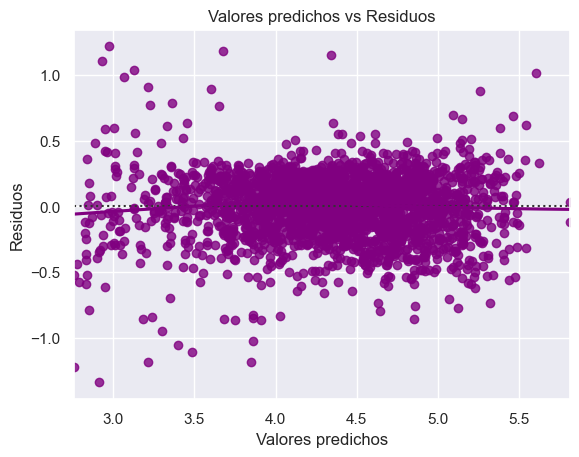

In [1306]:
# valores ajustados vs residuos

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Valores predichos vs Residuos")
plt.show()

**Observaciones**

* Debido a la ausencia de patrones, podemos decir que se cumple la linealidad e independecia

### Prueba de normalidad

* Comprobaremos la normalidad verificando la distribución de los residuos,comprobando el gráfico Q-Q de los residuos y utilizando la prueba de Shapiro-Wilk.

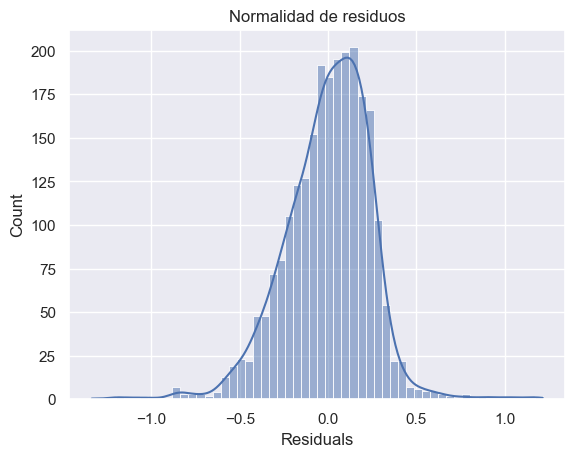

In [1307]:
# DISTRIBUCIÓN DE LOS RESIDUOS
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normalidad de residuos")
plt.show()

**observaciones**

* Una manera rápida de ver si cumplen una distribución normal es a traves del gráfico, que se asemeje a la forma de una campana, entonces se podría decir que si cumple con una distribución normal

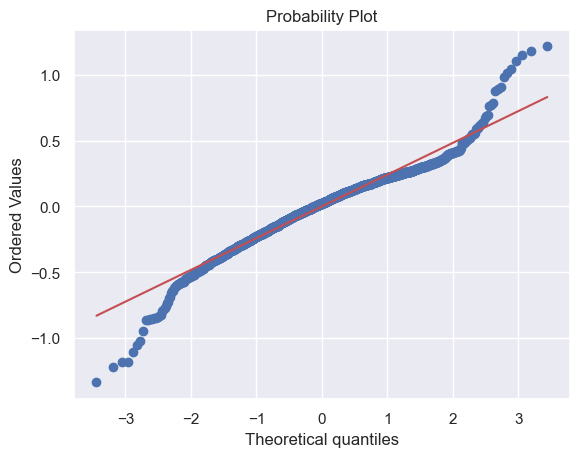

In [1308]:
# GRÁFICO Q-Q DE LOS RESIDUOS
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observaciones**

* Notamos que los residuos siguen una linea recta, exceptuando las colas

In [1309]:
# PRUEBA DE Shapiro-Wilk.
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.963180422782898, pvalue=2.4133874108916085e-24)

**Observaciones**

* los resultado de la prueba de normalidad indica que la hipótesis nula de que los datos provienen de una distribución normal no puede ser rechazada a un nivel de significancia del 0.05 (o cualquier nivel de significancia comúnmente utilizado). Esto se debe a que el valor de p es significativamente menor que el nivel de significancia. Por lo tanto, podemos concluir que los datos probablemente provienen de una distribución normal.

### Prueba de homoscedasticidad

* Se utiliza para verificar si la dispersión de los errores en un modelo de regresión es constante en todas las observaciones o si hay patrones sistemáticos de heterocedasticidad.
* Comprobaremos la homocedasticidad mediante la prueba de Goldfeldquandt.

In [1310]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.9788331853097936), ('p-value', 0.6441656836277485)]

**Observaciones**

* Debido a que el p-valor es de 0.614 en la prueba de Goldfeld-Quandt sugiere que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad, por lo que se puede concluir que los residuos son homocedásticos.

## Modelo Final

In [1311]:
x_train_final = x_train4.copy()
x_test_final = x_test4.copy()

In [1312]:
olsmodel_final = sm.OLS(y_train,sm.add_constant(x_train_final)).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.827
Model:                               OLS   Adj. R-squared:                  0.826
Method:                    Least Squares   F-statistic:                     821.3
Date:                   Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                           14:26:01   Log-Likelihood:                -36.992
No. Observations:                   2417   AIC:                             104.0
Df Residuals:                       2402   BIC:                             190.8
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1313]:
print("Metricas de rendimiento para datos de entrenamiento\n")
modelo_2_train_perf = model_performance_regression(olsmodel_final, sm.add_constant(x_train4), y_train)
modelo_2_train_perf

Metricas de rendimiento para datos de entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.245703,0.186286,0.827189,0.82611,4.512102


In [1314]:
print("Metricas de rendimiento para datos de entrenamiento\n")
modelo_2_test_perf = model_performance_regression(olsmodel_final, sm.add_constant(x_test4), y_test)
modelo_2_test_perf

Metricas de rendimiento para datos de entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2452,0.191482,0.823447,0.820853,4.588268


## Información práctica y recomendaciones

* Este modelo que hemos construido nos permite predecir el precio de los teléfonos usados en función de algunas características como la resolución de la cámara principal, el precio original del teléfono, la cantidad de memoria RAM, entre otros.

* El modelo tiene un R-cuadrado de 0.827, lo que significa que el 82.7% de la variación en los precios de los teléfonos usados se explica por las características que hemos incluido en el modelo. Esto es una buena indicación de que el modelo es adecuado para predecir los precios.

* También hemos evaluado la normalidad de los residuos, que son las diferencias entre los valores predichos y los valores reales. Los residuos se distribuyen normalmente, eso significa que el modelo está capturando toda la información relevante y no queda información adicional en los residuos.

* Basándonos en el modelo de regresión lineal múltiple que has presentado, podemos decir que las variables que más influyen en el precio son: "normalized_new_price" (precio nuevo normalizado), "main_camera_mp" (megapíxeles de la cámara principal), "selfie_camera_mp" (megapíxeles de la cámara frontal) y "weight" (peso del teléfono).

* Además, podemos observar que los teléfonos de la marca Apple tienen un impacto positivo en el precio, mientras que la marca Celkon y "otros" tienen un impacto negativo en el precio. Por lo tanto, si el negocio se enfoca en vender teléfonos de estas marcas, es importante tener en cuenta este factor al momento de establecer los precios.



___